# We look at the relationship between carbon emissions, population, and temperature change over the last 60 years.

#### We have three datasets from the World Bank that we are combining. One is world populaiton data, one is per capita emissions, and one is the change in temperature from the norm measured each month in each country around the world. 


### How this notebook is organized: 

1. getting the datasets <br>
2. temperature change<br>
    a. globally<br>
    b. in a given country<br>
    c. predicitons for the future<br>
3. pecapita emissions<br>
    a. gloablly<br>
    b. by country<br>
    c. comapring countries of different income levels<br>
4. Populaiton<br>
    a. gloablly<br>
    b. by country<br>
    c. predicting the future populaiton of the earth and of any country<br>
5. Total emissions<br>
    a. gloablly<br>
    c. by country<br>
6. Accumulated emissions<br>
7. Regression analysis<br>
      a. quantifying the relationships between,  emiissions, populaiton, and temperature change<br>
      c. comparing analyses made with FbProphet vs regression anlysis<br>
8. Conclusions<br>

In [2173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
! pip install pystan fbprophet
from fbprophet import Prophet



### Step One: Import the data and  pivot the data in some of the datasets.


In [2174]:
#read emissions csv

emissions= pd.read_csv("emission.csv")
emissions.set_index("Country Code")
emissions.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.906060,0.922474,0.930816,0.940570,0.996033,1.047280,...,1.021646,1.031833,1.041145,0.987393,0.971016,0.959978,0.933541,NaN,NaN,NaN
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,...,0.335351,0.263716,0.234037,0.232176,0.208857,0.203328,0.200151,NaN,NaN,NaN
3,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.090880,0.095283,0.096612,0.112376,0.133258,0.184803,...,0.490867,0.504655,0.507671,0.480743,0.472959,0.476438,0.515544,NaN,NaN,NaN
4,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.100835,0.082204,0.210533,0.202739,0.213562,0.205891,...,1.204799,1.261542,1.285365,1.260921,1.227703,1.034317,0.887380,NaN,NaN,NaN


### Here we have the per capita emissions datset. the data has not yet been pivoted. 

In [2175]:

#read population csv
population= pd.read_csv("populaiton country by year.csv")
population.set_index("Country Code")

#print(population.head())
population.set_index("Country Code")
population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,NaN


We pivot the dataset.

In [2176]:

#realign emissions

emissions2= emissions.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], 
        var_name="Year", 
        value_name="Value_of_Emissions")

emissions2.head()



,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value_of_Emissions
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,NaN
1,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.906060
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.046057
3,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.090880
4,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.100835


We have pivoted the data in emsissions so that year is a column.

In [2177]:
# Finding the percentage of missing variables in the dataset
percent_missing = emissions2.isnull().sum() * 100 / len(emissions2)
missing_value_df = pd.DataFrame({'column_name': emissions2.columns,'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending= False)
missing_value_df

,column_name,percent_missing
Value_of_Emissions,Value_of_Emissions,19.257822
Country Name,Country Name,0.000000
Country Code,Country Code,0.000000
Indicator Name,Indicator Name,0.000000
Indicator Code,Indicator Code,0.000000
Year,Year,0.000000


Value_of_Emissionsis is the per capita emissions. We are missing 19% of data for this category. It is mostly becasue most counttries do not have this data for the years 1960 and 1961.  


We can now calculate the average per capita emissions te wold over since 1960.

In [2178]:

#calculate average emissions
average= emissions2["Value_of_Emissions"].mean()
print("The average global emssions per capita since 1960 is: ")
print(average)

The average global emssions per capita since 1960 is: 
4.10493173511307


We used the dataset to calcualte the average emissions per capita. Next we will import the datset about the change in temperature. 

In [2179]:

#read temperature csv
temps= pd.read_csv("temperature.csv")
temps.head()



temps.loc[(temps["Area"]=="United States of America")]
temps['Area'] = temps['Area'].replace(['United States of America'],'United States')

temps.loc[(temps["Area"]=="United States")]

temps.loc[(temps["Area"]=="Viet Nam")]
temps['Area'] = temps['Area'].replace(['Viet Nam'],'Vietnam')

population['Country Name'] = population['Country Name'].replace(["Korea, Dem. People's Rep."],'North Korea')
emissions2['Country Name'] = emissions2['Country Name'].replace(["Korea, Dem. People's Rep."],'North Korea')
temps['Area'] = temps['Area'].replace(["Democratic People's Republic of Korea"],'North Korea')


population['Country Name'] = population['Country Name'].replace(["Korea, Rep."],'South Korea')
temps['Area'] = temps['Area'].replace(["Republic of Korea"],'South Korea')
emissions2['Country Name'] = emissions2['Country Name'].replace(["Korea, Rep."],'South Korea')

temps['Area'] = temps['Area'].replace(["Iran (Islamic Republic of)"],'Iran')
emissions2['Country Name'] = emissions2['Country Name'].replace(["Iran, Islamic Rep."],'Iran')
population['Country Name'] = population['Country Name'].replace(["Iran, Islamic Rep."],'Iran')

temps['Area'] = temps['Area'].replace(["United Kingdom of Great Britain and Northern Ireland)"],'United Kingdom')




temps['Area'] = temps['Area'].replace(["Venezuela (Bolivarian Republic of)"],'Venezuela')
emissions2['Country Name'] = emissions2['Country Name'].replace(["Venezuela, RB"],'Venezuela')
population['Country Name'] = population['Country Name'].replace(["Venezuela, RB"],'Venezuela')

temps['Area'] = temps['Area'].replace(["Bolivia (Plurinational State of)"],'Bolivia')

temps['Area'] = temps['Area'].replace(["Venezuela (Bolivarian Republic of)"],'Venezuela')
emissions2['Country Name'] = emissions2['Country Name'].replace(["Venezuela, RB"],'Venezuela')


population['Country Name'] = population['Country Name'].replace(["Yemen, Rep."],'Yemen')
emissions2['Country Name'] = emissions2['Country Name'].replace(["Yemen, Rep."],'Yemen')


temps['Area'] = temps['Area'].replace(["Czechia"],'Czech Republic')
temps['Area'] = temps['Area'].replace(["United Republic of Tanzania"],'Tanzania')


emissions2['Country Name'] = emissions2['Country Name'].replace(["Kyrgyz Republic"],'Kyrgyzstan')
population['Country Name'] = population['Country Name'].replace(["Kyrgyz Republic"],'Kyrgyzstan')

emissions2['Country Name'] = emissions2['Country Name'].replace(["Congo, Rep."],'Congo')
population['Country Name'] = population['Country Name'].replace(["Congo, Rep."],'Congo')
temps['Area'] = temps['Area'].replace(["C?te d'Ivoire"],"Cote d'Ivoire")


#population.loc[(population["Country Name"]=="Congo")]
#emissions2.loc[(emissions2["Country Name"]=="Venezuela")]
#temps.loc[(temps["Area"]=="Egypt")]

#population.drop("Area", axis = 1)




In [2180]:
temps['Area'] = temps['Area'].replace(["Egypt, Arab Rep."],'Egypt')
emissions2['Country Name'] = emissions2['Country Name'].replace(["Egypt, Arab Rep."],'Egypt')
population['Country Name'] = population['Country Name'].replace(["Egypt, Arab Rep."],'Egypt')




Some countries were named differently in the datasets. Here we align their names. 

In [2181]:


temps.loc[(temps["Area"]=="Palestine")]
temps['Area'] = temps['Area'].replace(['Palestine'],'West Bank and Gaza')




temps['Area'] = temps['Area'].replace(['United Kingdom of Great Britain and Northern Ireland'],'United Kingdom')




Next we must pivot the dataset.

In [2182]:

#realign population

population2= population.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], 
        var_name="Year", 
        value_name="Population")

population2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Population
0,Aruba,ABW,"Population, total",SP.POP.TOTL,1960,54208.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,1960,130836765.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960,8996967.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,1960,96396419.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,1960,5454938.0


Now we can merge the population and emissions datasets on Country name and Year.

In [2183]:

#merge populaiton to emissions
new_df = emissions2.merge(population2, left_on=['Country Name','Year'], right_on = ['Country Name','Year'], how='left')

print("emissions and population \n")
new_df.head()






emissions and population 



,Country Name,Country Code_x,Indicator Name_x,Indicator Code_x,Year,Value_of_Emissions,Country Code_y,Indicator Name_y,Indicator Code_y,Population
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,NaN,ABW,"Population, total",SP.POP.TOTL,54208.0
1,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.906060,AFE,"Population, total",SP.POP.TOTL,130836765.0
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.046057,AFG,"Population, total",SP.POP.TOTL,8996967.0
3,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.090880,AFW,"Population, total",SP.POP.TOTL,96396419.0
4,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.100835,AGO,"Population, total",SP.POP.TOTL,5454938.0


Now that we have population and per capita emissions, we can created a calculated field. We find the total emissions for each country in each year by multiplying the per capita emissions by the population.

In [2184]:

new_df["Total_emissions"] = new_df["Value_of_Emissions"] * new_df["Population"]

new_df.head()


,Country Name,Country Code_x,Indicator Name_x,Indicator Code_x,Year,Value_of_Emissions,Country Code_y,Indicator Name_y,Indicator Code_y,Population,Total_emissions
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,NaN,ABW,"Population, total",SP.POP.TOTL,54208.0,NaN
1,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.906060,AFE,"Population, total",SP.POP.TOTL,130836765.0,1.185459e+08
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.046057,AFG,"Population, total",SP.POP.TOTL,8996967.0,4.143710e+05
3,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.090880,AFW,"Population, total",SP.POP.TOTL,96396419.0,8.760463e+06
4,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.100835,AGO,"Population, total",SP.POP.TOTL,5454938.0,5.500500e+05


Our temperature datset is by month and year. To merge it with this dataset, we need to get rid of the months. We will do this by averaging the temperature change over the 12 months of the year and creating a yearly value. 

In [2185]:

#make new df grouped by month and averaging temp change

new_temps= temps.groupby(["Year", "Area"]).mean()
new_temps.head()




Area Code (FAO)  Element Code  Months Code  Year Code  \
Year Area                                                                    
1961 Afghanistan                 2.0        7271.0  7009.882353     1961.0   
     Albania                     3.0        7271.0  7009.882353     1961.0   
     Algeria                     4.0        7271.0  7009.882353     1961.0   
     American Samoa              5.0        7271.0  7009.882353     1961.0   
     Andorra                     6.0        7271.0  7009.882353     1961.0   

                        Value  
Year Area                      
1961 Afghanistan    -0.017471  
     Albania         0.481588  
     Algeria         0.228412  
     American Samoa  0.024588  
     Andorra         0.947941

We have some columns we don't need, such as months code, so we can drop those. 

In [2186]:
#drop months from temps
nomonths_temps = temps
nomonths_temps = nomonths_temps.drop(['Months'], axis=1)
nomonths_temps = nomonths_temps.drop(['Months Code'], axis=1)


nomonths_temps2= nomonths_temps.groupby(["Year", "Area"]).mean()
nomonths_temps2.head()



Area Code (FAO)  Element Code  Year Code     Value
Year Area                                                              
1961 Afghanistan                 2.0        7271.0     1961.0 -0.017471
     Albania                     3.0        7271.0     1961.0  0.481588
     Algeria                     4.0        7271.0     1961.0  0.228412
     American Samoa              5.0        7271.0     1961.0  0.024588
     Andorra                     6.0        7271.0     1961.0  0.947941

In the temperature datset, the year is a string, while it is an integer in teh other datset. We must make them the same type in order to merge. 

In [2187]:
nomonths_temps["Year Code"].astype(int)
nomonths_temps.head()




,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change,2,Afghanistan,7271,Temperature change,1961,1961,?C,0.746,Fc,Calculated data
1,ET,Temperature change,2,Afghanistan,7271,Temperature change,1962,1962,?C,0.009,Fc,Calculated data
2,ET,Temperature change,2,Afghanistan,7271,Temperature change,1963,1963,?C,2.695,Fc,Calculated data
3,ET,Temperature change,2,Afghanistan,7271,Temperature change,1964,1964,?C,-5.277,Fc,Calculated data
4,ET,Temperature change,2,Afghanistan,7271,Temperature change,1965,1965,?C,1.827,Fc,Calculated data


We can clean up the dataset by choosing just the Area, Year, and temperature change value. 

In [2188]:
#finalize temps without months, grouping by area and year

temp_final= nomonths_temps[["Area", "Year","Value"]]



Then we average each country by year, to get one singular yearly value per country. 

In [2189]:
#finally get the temps dataset in order


yearly_avg2=temp_final[["Area", "Year", "Value"]].groupby(["Area", "Year"],as_index=False).Value.mean()
yearly_avg2.head()



,Area,Year,Value
0,Afghanistan,1961,-0.017471
1,Afghanistan,1962,-0.248824
2,Afghanistan,1963,0.848176
3,Afghanistan,1964,-0.958882
4,Afghanistan,1965,-0.102294


In [2190]:
# Finding the percentage of missing variables in the dataset
percent_missing = yearly_avg2.isnull().sum() * 100 / len(yearly_avg2)
missing_value_df = pd.DataFrame({'column_name': yearly_avg2.columns,'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending= False)
missing_value_df

,column_name,percent_missing
Value,Value,2.321627
Area,Area,0.000000
Year,Year,0.000000


We are only missing 2% of data. 

In [2191]:

new_df.head(20)

#change data types to match

new_df["Year"]= pd.to_numeric(new_df["Year"], errors='coerce')

new_df.head()



,Country Name,Country Code_x,Indicator Name_x,Indicator Code_x,Year,Value_of_Emissions,Country Code_y,Indicator Name_y,Indicator Code_y,Population,Total_emissions
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960.0,NaN,ABW,"Population, total",SP.POP.TOTL,54208.0,NaN
1,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960.0,0.906060,AFE,"Population, total",SP.POP.TOTL,130836765.0,1.185459e+08
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960.0,0.046057,AFG,"Population, total",SP.POP.TOTL,8996967.0,4.143710e+05
3,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960.0,0.090880,AFW,"Population, total",SP.POP.TOTL,96396419.0,8.760463e+06
4,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960.0,0.100835,AGO,"Population, total",SP.POP.TOTL,5454938.0,5.500500e+05


We can finally merge the three datsets. 

In [2192]:

#merge temp with the emissions+popualiton datset


final= new_df.merge(yearly_avg2, left_on=['Country Name','Year'], right_on = ['Area','Year'], how='left')


Let's drop all the unnecessary columns

In [2193]:

#drop unnecesay colums


final2 = final.drop(["Indicator Name_x", "Indicator Code_x", "Country Code_y", "Indicator Code_y", "Indicator Name_y"], axis=1)




In [2194]:
final2.to_csv("countries_updated.csv")

A lot of data is missing for 1960, but starting in 1961, we have lots of data!

We notice that the dataset includes not only countries, but also continent groupings and income level groupings. We will remove these from the datset so that our data is just individual countries. 
Later, we will create datasets that only have income and contient gorupings in order to compare high and low income countires.

In [2195]:

#print(final2.head())
final6= final2.set_index("Country Code_x")


#removing dta about contentnts and income groups so each entry is just a country

final7 = final6.drop(["OSS", "AFE", "PRE", "AFW","ARB", "CEB", "CSS", "EAP", "EAR", "EAS", "ECA", "ECS","EMU", "EUU", "FCS", "HIC", "HPC", "IBD", "IBT", "IDA", "IDB","IDX","INX", "LAC", "LCN", "LDC", "LIC", "LMC", "LMY", "LTE", "MEA", "MIC", "MNA", "NAC", "OED", "OSS", "PRE", "PSS", "PST", "SSA", "SSF", "SST", "TEA", "TEC", "TLA", "TMN", "TSA", "TSS", "UMC", "WLD" ])
final7.head()







,Country Name,Year,Value_of_Emissions,Population,Total_emissions,Area,Value
Country Code_x,,,,,,,
ABW,Aruba,1960.0,NaN,54208.0,NaN,NaN,NaN
AFG,Afghanistan,1960.0,0.046057,8996967.0,414371.0,NaN,NaN
AGO,Angola,1960.0,0.100835,5454938.0,550050.0,NaN,NaN
ALB,Albania,1960.0,1.258195,1608800.0,2024184.0,NaN,NaN
AND,Andorra,1960.0,NaN,13410.0,NaN,NaN,NaN


## Our dataset is finally in order. Now we can use it to graph trends and make predictions. 

# Part Two: Temperature change

We'll start with global temperature change. 

<AxesSubplot:title={'center':'Global Temperature Change'}, xlabel='Year'>

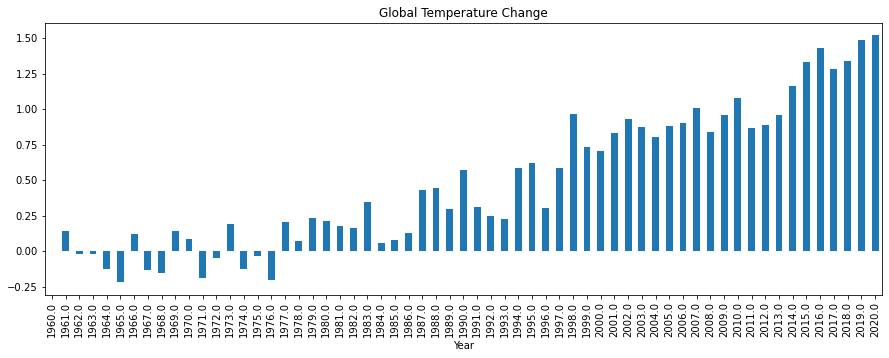

In [2196]:
#graph gloabl temperature change
import matplotlib as plt
global_change= final7[["Country Name", "Year", "Value"]].groupby(by="Year").Value.mean()
global_change.plot(kind= "bar",  figsize=(15, 5), title= "Global Temperature Change")



### We see that the average temperature is increasing from the norm, and is up to about 1.5 degrees higher than it was in the early 1960s. 

To do predictions with data, we need to get our year into datetime format. 

In [2197]:


final7['dateInt']= pd.to_datetime(final7['Year'], format='%Y')
final7.dtypes


/var/folders/bc/88y__jqx7s591njj3c2hmjn40000gn/T/ipykernel_993/2246272742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final7['dateInt']= pd.to_datetime(final7['Year'], format='%Y')


Country Name                  object
Year                         float64
Value_of_Emissions           float64
Population                   float64
Total_emissions              float64
Area                          object
Value                        float64
dateInt               datetime64[ns]
dtype: object

Using FbProphet, we predict that global tempertaure change will excede 3 degrees Celcius in the 1070s. 

With a lot fo countries, it would take a while to graph each one. Instead, we accept user input. Choose a country and see what the graph looks like. Note: Syria= Syrian Arab Republic.   Palestine = West Bank and Gaza.  England= United Kingdom

Enter a country: Egypt
You chose: Egypt
the average change in temperatrue away from the norm in Egypt since 1961 is: 
0.349


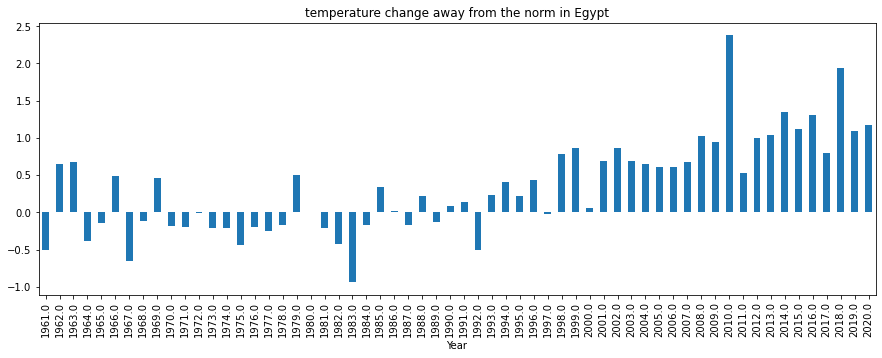

In [2198]:
#Graph temperature change for any chosen country

#accept input

val= input("Enter a country: ")
print("You chose: " + str(val))

#graph
df_country= final[["Area", "Year", "Value"]].loc[(final["Area"] ==val)].groupby(by="Year").Value.mean()



df_country.plot(kind="bar", figsize=(15, 5), title = "temperature change away from the norm in " + str(val))


#claculate average
average_country_temp_change= final[["Area", "Year", "Value"]].loc[(final["Area"] ==val)].Value.mean()

rounded_average_country_temp_change = round(average_country_temp_change,3)
print("the average change in temperatrue away from the norm in " + str(val) + " since 1961 is: ")
print(rounded_average_country_temp_change)



# We will now use FbProphet to predict future temperatures


First we need to get our dataset in order.

In [2199]:
temp_change= pd.read_csv("temperature.csv")

from time import strptime


import datetime as dt

from time import strptime


temp_change.drop(["Domain Code", "Domain", "Area Code (FAO)", "Area", "Element Code","Element", "Months Code","Year Code","Unit", "Flag", "Flag Description"], axis=1, inplace = True)



temp_change = temp_change[temp_change['Months'] != 'Meteorological year']
temp_change = temp_change[temp_change['Months'] != 'Sep?Oct?Nov']
temp_change = temp_change[temp_change['Months'] != 'Jun?Jul?Aug']
temp_change = temp_change[temp_change['Months'] != 'Mar?Apr?May']
temp_change = temp_change[temp_change['Months'] != 'Dec?Jan?Feb']



import datetime


# Defining all the conditions inside a function
def condition(x):
    if x=="January":
        return "01-01"
    elif x=="February":
        return "02-01"
    elif x=="March":
        return "03-01"
    elif x=="April":
        return "04-01"
    elif x=="May":
        return "05-01"
    elif x=="June":
        return "06-01"
    elif x=="July":
        return "07-01"
    elif x=="August":
        return "08-01"
    elif x=="September":
        return "09-01"
    elif x=="October":
        return "10-01"
    elif x=="November":
        return "11-01"
    else:
        return "12-01"
  # Applying the conditions
temp_change['Month_no'] = temp_change['Months'].apply(condition)




temp_change['dateInt']=temp_change['Month_no'].astype(str) + "-" + temp_change['Year'].astype(str).str.zfill(2)
temp_change['ds'] = pd.to_datetime(temp_change['dateInt'], format='%m-%d-%Y')

temp_change.drop(["Months", "Year"], axis=1, inplace= True)


temp_change.drop(["dateInt", "Month_no"], axis=1, inplace = True)


temp_change = temp_change.rename({'Value': 'y'}, axis=1)  




We will start by predicitng global temperature change and graphing our prediciton.

In [2200]:
m= Prophet(interval_width= 0.95)
model = m.fit(temp_change)

Initial log joint probability = -836.724
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        305894    0.00314254       3181.51           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        305942    0.00308647       1798.94           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        306004    0.00132384       967.227           1           1      348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        306020    0.00529468        2456.4       3.169      0.3169      455   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        306059   0.000184358       471.966           1           1      564   
    Iter      log prob        ||dx||      ||grad||       alpha  

future= m.make_future_dataframe(periods=100, freq= "M")
forecast = m.predict(future)


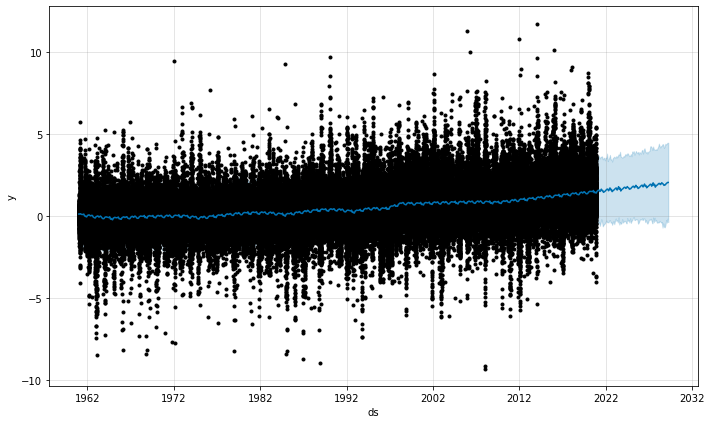

In [2201]:
future1= m.make_future_dataframe(periods=100, freq= "M")
forecast = m.predict(future1)
plot1=m.plot(forecast)


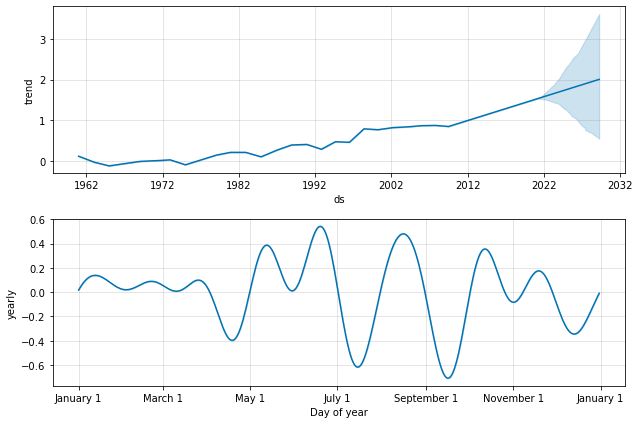

In [2202]:
plot2=m.plot_components(forecast)

In [2203]:
forecast_short= forecast[["ds", "yhat"]]
print("Based on this model, here is our prediciton for 2028-2029")
forecast_short.tail()

Based on this model, here is our prediciton for 2028-2029


,ds,yhat
815,2028-11-30,1.921211
816,2028-12-31,1.987024
817,2029-01-31,2.021650
818,2029-02-28,2.062095
819,2029-03-31,2.062509


In [2204]:
forecast_short.to_csv("forecast_of_temperatures_short.csv")

## Here is a yearly prediction. 


Initial log joint probability = -71.1986
Iteration  1. Log joint probability =    32.0219. Improved by 103.22.
Iteration  2. Log joint probability =    74.2257. Improved by 42.2039.
Iteration  3. Log joint probability =    99.7522. Improved by 25.5265.
Iteration  4. Log joint probability =    102.696. Improved by 2.94363.
Iteration  5. Log joint probability =    102.885. Improved by 0.189089.
Iteration  6. Log joint probability =    102.891. Improved by 0.00604606.
Iteration  7. Log joint probability =      102.9. Improved by 0.00888687.
Iteration  8. Log joint probability =    102.907. Improved by 0.00696125.
Iteration  9. Log joint probability =    102.928. Improved by 0.0208275.
Iteration 10. Log joint probability =    102.944. Improved by 0.0161006.
Iteration 11. Log joint probability =    102.949. Improved by 0.00526321.
Iteration 12. Log joint probability =    103.131. Improved by 0.181624.
Iteration 13. Log joint probability =    103.171. Improved by 0.0401531.
Iteration 14. Lo

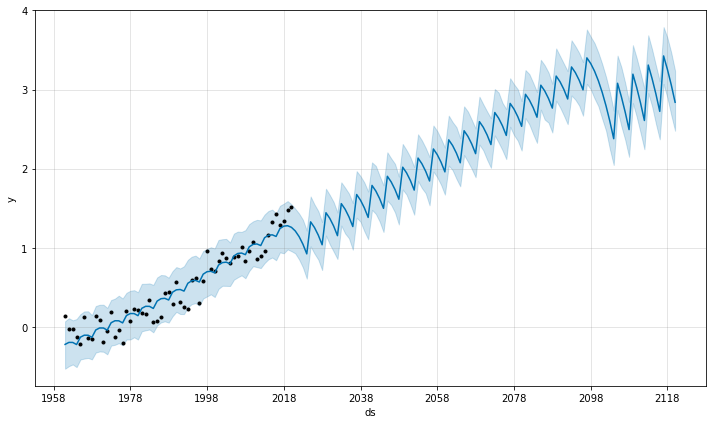

In [2271]:
global_change2= final7[[ "Year", "Value"]].groupby(by="Year").Value.mean()

global_change2 = pd.DataFrame(global_change2)
global_change2.head()

#merge populaiton to emissions
global_total_emissions_final= global_change2.merge(world_total_emissions, left_on=['Year'], right_on = ['Year'], how='left')


global_total_emissions_final.head()

global_total_emissions_final["running_total"]= global_total_emissions_final.Total_emissions.cumsum()
global_total_emissions_final.head()

global_total_emissions_final_for_fb = global_total_emissions_final[["Year", "Value"]]
global_total_emissions_final_for_fb = global_total_emissions_final_for_fb.astype({"Year": int, "Value": float})
global_total_emissions_final_for_fb=global_total_emissions_final_for_fb.dropna()
global_total_emissions_final_for_fb.tail()
global_total_emissions_final_for_fb["ds"]=  pd.to_datetime(global_total_emissions_final_for_fb["Year"], format='%Y')
global_total_emissions_final_for_fb.drop([ "Year"], axis=1, inplace= True)

global_total_emissions_final_for_fb = global_total_emissions_final_for_fb.rename({"Value" : "y"}, axis=1)

global_total_emissions_final_for_fb.head()

m= Prophet(interval_width= 0.95)

model = m.fit(global_total_emissions_final_for_fb)


future= m.make_future_dataframe(periods=100, freq= "Y")
forecast = m.predict(future)



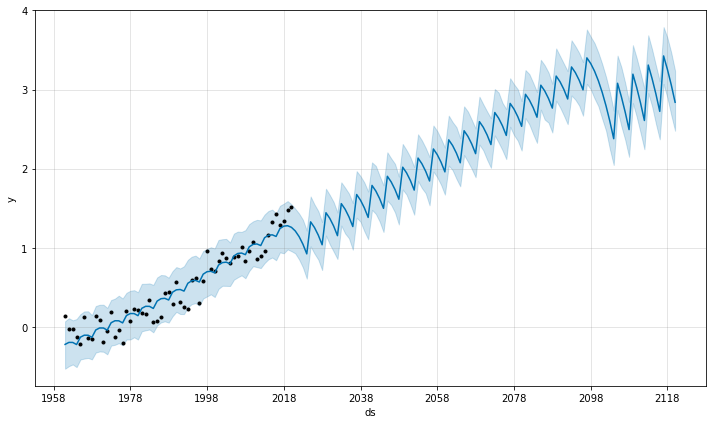

In [2272]:

plot1=m.plot(forecast)

In [2273]:

forecast_condensed= forecast[["ds", "yhat"]]
forecast_condensed.reset_index(drop=False, inplace= False)


forecast_2030= forecast_condensed.loc[(forecast_condensed["ds"]=="2030-12-31")].yhat
print("in 2030, we expect the temp to be: " + str(forecast_2030))

forecast_2040= forecast_condensed.loc[(forecast_condensed["ds"]=="2040-12-31")].yhat
print("in 2040, we expect the temp to be: " + str(forecast_2040))

forecast_2050= forecast_condensed.loc[(forecast_condensed["ds"]=="2050-12-31")].yhat
print("in 2050, we expect the temp to be: " + str(forecast_2050))

forecast_2060= forecast_condensed.loc[(forecast_condensed["ds"]=="2060-12-31")].yhat
print("in 2060, we expect the temp to be: " + str(forecast_2060))

forecast_2070= forecast_condensed.loc[(forecast_condensed["ds"]=="2070-12-31")].yhat
print("in 2070, we expect the temp to be: " + str(forecast_2070))

forecast_2080= forecast_condensed.loc[(forecast_condensed["ds"]=="2080-12-31")].yhat
print("in 2080, we expect the temp to be: " + str(forecast_2080))


forecast_2090= forecast_condensed.loc[(forecast_condensed["ds"]=="2090-12-31")].yhat
print("in 2090, we expect the temp to be: " + str(forecast_2090))



in 2030, we expect the temp to be: 70    1.276283
Name: yhat, dtype: float64
in 2040, we expect the temp to be: 80    1.789575
Name: yhat, dtype: float64
in 2050, we expect the temp to be: 90    1.851852
Name: yhat, dtype: float64
in 2060, we expect the temp to be: 100    2.365144
Name: yhat, dtype: float64
in 2070, we expect the temp to be: 110    2.427422
Name: yhat, dtype: float64
in 2080, we expect the temp to be: 120    2.940714
Name: yhat, dtype: float64
in 2090, we expect the temp to be: 130    3.002991
Name: yhat, dtype: float64


In [1822]:
forecast_condensed.to_csv("Temperature_forecast_long.csv")

Now we can input any country and predict what the temperatue change will be there in the coming years. 

In [1854]:
country_for_prophet= final8[["Area", "Year", "Value"]]

country_for_prophet.reset_index(drop=True)
country_for_prophet = country_for_prophet.rename(columns={'Area': 'Area', 'Value': 'y', "Year":"ds"})

country_for_prophet = country_for_prophet.astype({"ds": int, "y": float, "Area":str })


input a country Ireland

Initial log joint probability = -71.1202
Iteration  1. Log joint probability =    15.8046. Improved by 86.9248.
Iteration  2. Log joint probability =     18.947. Improved by 3.14237.
Iteration  3. Log joint probability =    24.5549. Improved by 5.6079.
Iteration  4. Log joint probability =     24.578. Improved by 0.0231348.
Iteration  5. Log joint probability =    24.5819. Improved by 0.00391192.
Iteration  6. Log joint probability =    24.6377. Improved by 0.0558241.
Iteration  7. Log joint probability =    24.6662. Improved by 0.0284499.
Iteration  8. Log joint probability =    24.7306. Improved by 0.0644112.
Iteration  9. Log joint probability =     24.785. Improved by 0.0543851.
Iteration 10. Log joint probability =    24.8344. Improved by 0.0494084.
Iteration 11. Log joint probability =    24.8556. Improved by 0.0211975.
Iteration 12. Log joint probability =    24.8727. Improved by 0.0171331.
Iteration 13. Log joint probability =    24.9477. Improved by 0.

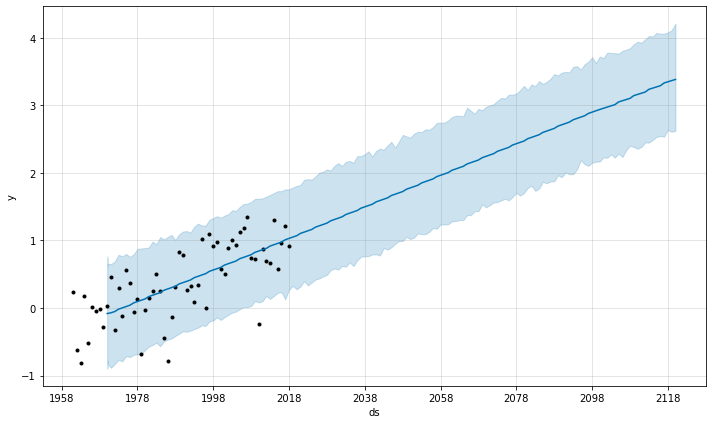

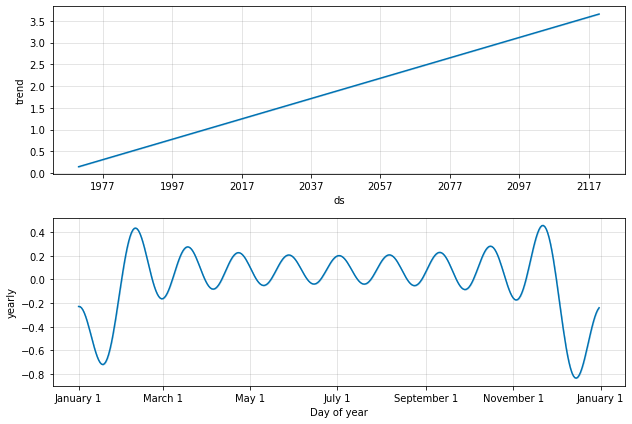

In [1542]:
a=input("input a country ")

Country_for_prophet_specific= country_for_prophet[["Area", "y", "ds"]].loc[(country_for_prophet["Area"]==a)]


Country_for_prophet_specific.reset_index(drop=True)
Country_for_prophet_specific.drop(["Area"],  axis=1, inplace = True)
m= Prophet(interval_width= 0.95)
model = m.fit(Country_for_prophet_specific)
future= m.make_future_dataframe(periods=150, freq= "Y")
forecast = m.predict(future)

print("Predicted temperatue change in: " + str(a))
plot1=m.plot(forecast)


plot2=m.plot_components(forecast)

In [2213]:
Country_for_prophet_specific2= forecast[["ds", "yhat"]]

print("The prediciton for temperatures in " +str(a) + " is: \n")
Country_for_prophet_specific2.tail()

The prediciton for temperatures in Ireland is: 



,ds,yhat
815,2028-11-30,1.921211
816,2028-12-31,1.987024
817,2029-01-31,2.021650
818,2029-02-28,2.062095
819,2029-03-31,2.062509


# Part Three:  Per capita emissions

## We can take a look at global per capita emissions. 

The average global per capita emissions over the past 60 years are: 4.1


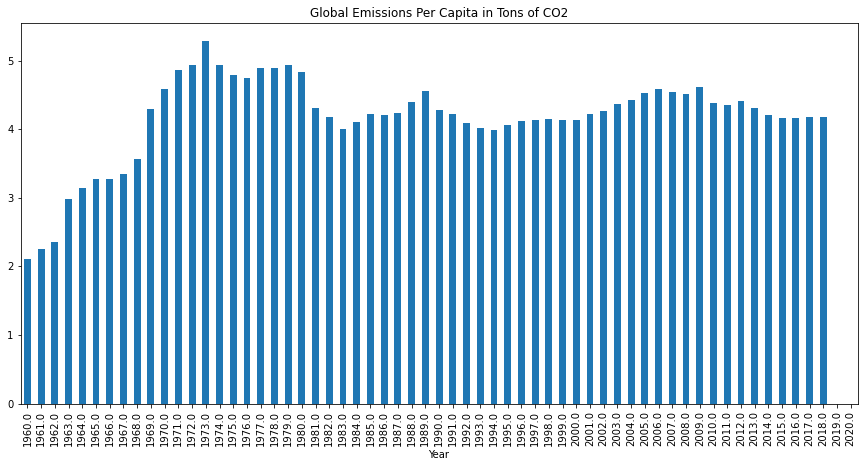

In [2214]:
#global emissions per capita

global_emissions= final7[["Country Name", "Year", "Value_of_Emissions"]].groupby(by="Year").Value_of_Emissions.mean()
global_emissions.plot(kind= "bar", figsize=(15, 7), title= "Global Emissions Per Capita in Tons of CO2")

rounded_global_average= round(average, 2)


print("The average global per capita emissions over the past 60 years are: " +str(rounded_global_average))

We see that per capita emissions have leveled off over the past decade, and remain at about 4 tons per person. 

Now let's look at emissions for the USA. 

the average emissions over the last 60 years in the US is: 18.859 tons of C02
Compare this to the global average, which is: 4.105
This is 4.59 times greater than the global average


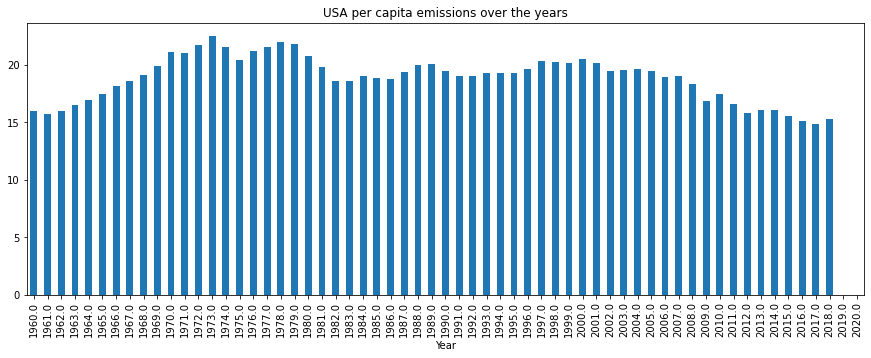

In [2215]:
#graph emissions just of usa


df_usa= final2[["Country Name", "Year", "Value_of_Emissions"]].loc[(final2["Country Name"] =="United States")].groupby(by="Year").Value_of_Emissions.mean()

df_usa.plot(kind= "bar", figsize=(15, 5), title = "USA per capita emissions over the years")

average_usa_emissions= final2[["Country Name", "Year", "Value_of_Emissions"]].loc[(final2["Country Name"] =="United States")].Value_of_Emissions.mean()

rounded_average_usa_emiss = round(average_usa_emissions, 3)
print("the average emissions over the last 60 years in the US is: "+ str(rounded_average_usa_emiss) + " tons of C02")

rounded_global_average= round(average, 3)

print("Compare this to the global average, which is: " + str(rounded_global_average))

times_greater= round((rounded_average_usa_emiss/rounded_global_average),2)
print("This is " + str(times_greater) + " times greater than the global average")


To look at individual countries, we can input a value and graph them, and we can find the average emissions over the last 60 years. 

Enter a country: South Korea
The average emissions per capita in South Korea since 1961 is: 6.21678
Compare this to the global average, which is: 4.10493
South Korea's emissions are 1.51 times the global average


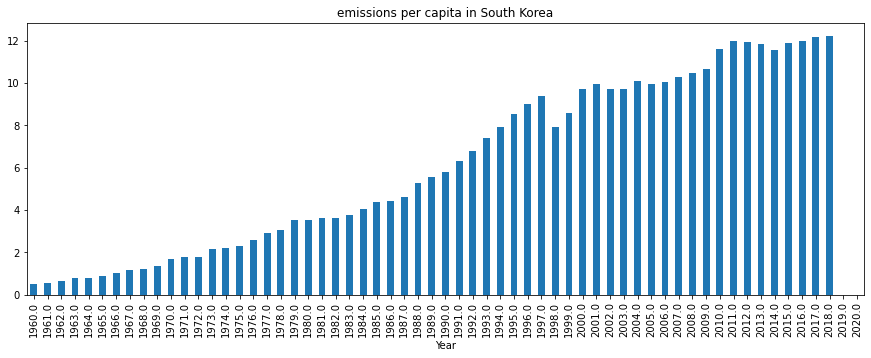

In [2216]:

#Emissions per capita with input value


valz= input("Enter a country: ")


df_country3= final7[["Country Name", "Year", "Value_of_Emissions"]].loc[(final7["Country Name"] ==valz)].groupby(by="Year").Value_of_Emissions.mean()

df_country3.plot(kind="bar", figsize=(15, 5), title = "emissions per capita in " +str(valz))


#claculate average
average_country_emissions_per_capita= final7[["Area", "Year", "Value_of_Emissions"]].loc[(final7["Area"] ==valz)].Value_of_Emissions.mean()

rounded_average_country_emissions_per_capita = round(average_country_emissions_per_capita,5)
print("The average emissions per capita in " + str(valz) + " since 1961 is: " +str(rounded_average_country_emissions_per_capita))


#calculate average emissions

rounded_global_average= round(average, 5)

print("Compare this to the global average, which is: " + str(rounded_global_average))

times_greater= round((rounded_average_country_emissions_per_capita/rounded_global_average),2)
print( str(valz) + "'s emissions are " + str(times_greater) + " times the global average")


## Now let's look at country and income groupings.
We have groupings for geographic areas as weel as income groups, and one that is all the world. We create a variety of dataframes to encompass the data we want to work with. 

In [2217]:

#world
df_world= final2[["Country Name", "Year", "Population", "Total_emissions", "Value_of_Emissions", "Value"]].loc[(final2["Country Name"] =="World")]
df_world.head()

#rich vs poor
df_indebted= final2[["Country Name", "Year", "Population", "Total_emissions", "Value_of_Emissions", "Value"]].loc[(final2["Country Name"] =="Heavily indebted poor countries (HIPC)")]

df_rich= final2[["Country Name", "Year", "Population", "Total_emissions", "Value_of_Emissions", "Value"]].loc[(final2["Country Name"] =="High income")]


#Latin America & Caribbean (excluding high income)
#Latin America & Caribbean
#Least developed countries: UN classification
#Low income
#Lower middle income
#Low & middle income
#Late-demographic dividend
#Middle East & North Africa
#Middle income
#Middle East & North Africa (excluding high income)
#North America
#OECD members
#Other small states
#Pre-demographic dividend
#Pacific island small states
#Post-demographic dividend
#Russian Federation
#Sub-Saharan Africa (excluding high income)
#Sub-Saharan Africa
#Small states
#East Asia & Pacific
#Europe & Central Asia
#Latin America & the Caribbean
#Middle East & North Africa
#South Asia (IDA & IBRD)
#Sub-Saharan Africa (IDA & IBRD countries)
#Upper middle income
#World


#let's count how many countries and territories

counts = final2["Country Name"].nunique()
print(counts)

#according to this, there are 266 countries in the dataframe. This is becasue many territories are represented seperately (eg, Guam and Gibraltar)


df_continents= final2[["Country Name", "Year", "Population", "Total_emissions", "Value_of_Emissions", "Value"]].loc[((final2["Country Name"] =="Latin America & Caribbean") |(final2["Country Name"]== "Middle East & North Africa")|(final2["Country Name"]== "North America")|(final2["Country Name"]== "Pacific island small states")|(final2["Country Name"]== "Russian Federation")|(final2["Country Name"]== "Sub-Saharan Africa")|(final2["Country Name"]== "East Asia & Pacific")|(final2["Country Name"]== "Europe & Central Asia")|(final2["Country Name"]== "Middle East & North Africa")|(final2["Country Name"]== "South Asia (IDA & IBRD)"))]
df_continents.head()



266


,Country Name,Year,Population,Total_emissions,Value_of_Emissions,Value
63,East Asia & Pacific,1960.0,1.041674e+09,1.232271e+09,1.182973,NaN
65,Europe & Central Asia,1960.0,6.667534e+08,4.836199e+09,7.253356,NaN
134,Latin America & Caribbean,1960.0,2.198288e+08,3.026309e+08,1.376666,NaN
153,Middle East & North Africa,1960.0,1.052032e+08,9.896887e+07,0.940740,NaN
170,North America,1960.0,1.986244e+08,3.084636e+09,15.529995,NaN


In [1646]:
df_continents.to_csv("continents.csv")

Here we have the continental groupings. They have emissions abd Population data, but there is no data for temperature change on this scale. 

## We plot the per capita emissions by contiental grouping.

<AxesSubplot:title={'center':'Average per capita emissions by continent since 1960'}, xlabel='Country Name'>

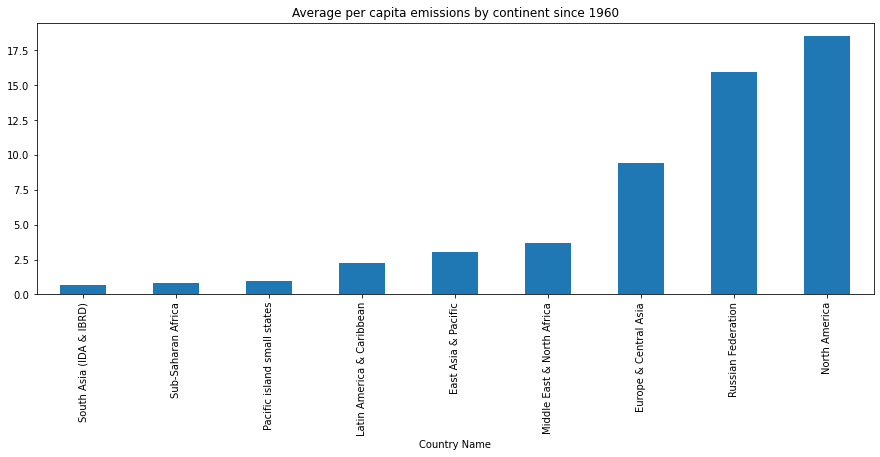

In [2218]:
average_continental_emissions= df_continents.groupby(["Country Name"]).Value_of_Emissions.mean()


#average_continental_emissions.plot(kind="bar", figsize=(15, 5), title= "Average per capita emissions by continent")

average_continental_emissions_sorted= average_continental_emissions.sort_values()
average_continental_emissions_sorted.plot(kind="bar", figsize=(15, 5), title= "Average per capita emissions by continent since 1960")



<AxesSubplot:title={'center':'Per Capita Emissions by Continent in 2018'}, xlabel='Country Name'>

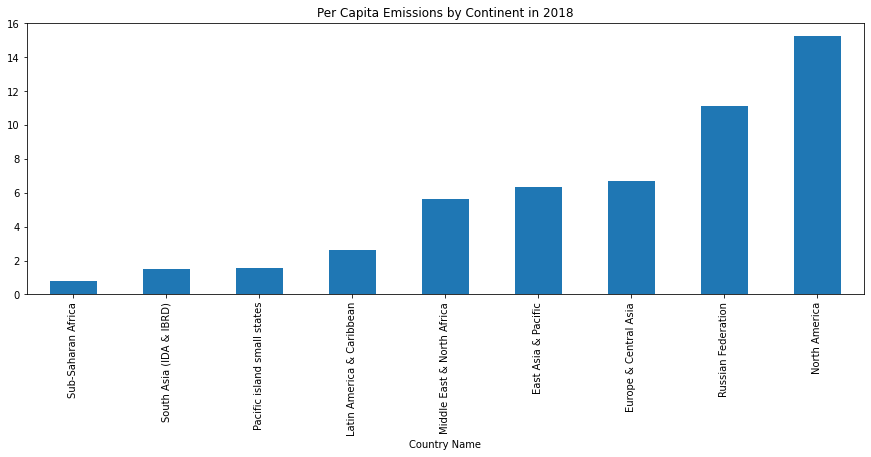

In [1861]:
#average_continental_emissions


total_continental_emnissions_2018=  df_continents.loc[(df_continents["Year"]==2018)].groupby(["Country Name"]).Value_of_Emissions.sum()
#total_continental_emnissions_2018.plot(kind="bar", title= "per capita contiental emissions 2018")

total_continental_emissions_sorted= total_continental_emnissions_2018.sort_values()
total_continental_emissions_sorted.plot(kind="bar", figsize=(15, 5), title= "Per Capita Emissions by Continent in 2018")




### We see that the current emissions epr capita is in line with the average over the past 60 years. North America has the highest per capita emissions, foolowed by the Russian Federation and Europe and East Asia. The only difference is that South Asia has overtaken Sub- Saharan Africa by a small margin.  

I created datasets for  each income grouping for population, per capita emissions, and total emissions. 

In [2219]:


df_lowincome= final3[["Country Name", "Year", "Total_emissions"]].loc[(final3["Country Name"] =="Low income")].groupby(by="Year").Total_emissions.mean()



df_lowincome_pop= final2[["Country Name", "Year", "Population"]].loc[(final2["Country Name"] =="Low income")].groupby(by="Year").Population.mean()
df_middle_pop= final2[["Country Name", "Year", "Population"]].loc[(final2["Country Name"] =="Middle income")].groupby(by="Year").Population.mean()

df_middle_total_emissions= final2[["Country Name", "Year", "Total_emissions"]].loc[(final2["Country Name"] =="Middle income")].groupby(by="Year").Total_emissions.mean()
df_rich_emissions= final2[["Country Name", "Year", "Total_emissions"]].loc[(final2["Country Name"] =="High income")].groupby(by="Year").Total_emissions.mean()
df_indebted_emissions= final2[["Country Name", "Year", "Total_emissions"]].loc[(final2["Country Name"] =="Heavily indebted poor countries (HIPC)")].groupby(by="Year").Total_emissions.mean()

df_rich_per_capita_emissions= final2[["Country Name", "Year", "Value_of_Emissions"]].loc[(final2["Country Name"] =="High income")].groupby(by="Year").Value_of_Emissions.mean()
df_indebted_per_capita_emissions= final2[["Country Name", "Year", "Value_of_Emissions"]].loc[(final2["Country Name"] =="Heavily indebted poor countries (HIPC)")].groupby(by="Year").Value_of_Emissions.mean()

df_middle_per_capita_emissions= final2[["Country Name", "Year", "Value_of_Emissions"]].loc[(final2["Country Name"] =="Middle income")].groupby(by="Year").Value_of_Emissions.mean()
df_low_income_per_capita_emissions= final2[["Country Name", "Year", "Value_of_Emissions"]].loc[(final2["Country Name"] =="Low income")].groupby(by="Year").Value_of_Emissions.mean()


df_low_income_total_emissions= final2[["Country Name", "Year", "Total_emissions"]].loc[(final2["Country Name"] =="Low income")].groupby(by="Year").Total_emissions.mean()
df_middle_emissions= final2[["Country Name", "Year", "Total_emissions"]].loc[(final2["Country Name"] =="Middle income")].groupby(by="Year").Total_emissions.mean()


df_least_developed_per_capita= final2[["Country Name", "Year", "Value_of_Emissions"]].loc[(final2["Country Name"] =="Least developed countries: UN classification")].groupby(by="Year").Value_of_Emissions.mean()



df_economies= final2[["Country Name", "Year", "Population", "Total_emissions", "Value_of_Emissions", "Value"]].loc[((final2["Country Name"] =="Low income") |(final2["Country Name"]== "Middle income")|(final2["Country Name"]== "Heavily indebted poor countries (HIPC)")|(final2["Country Name"]== "High income")|(final2["Country Name"]== "Least developed countries: UN classification"))]
df_economies.head()
df_economies.to_csv("economies.csv")


Here we graph the income groups per capita emissions against each other. 

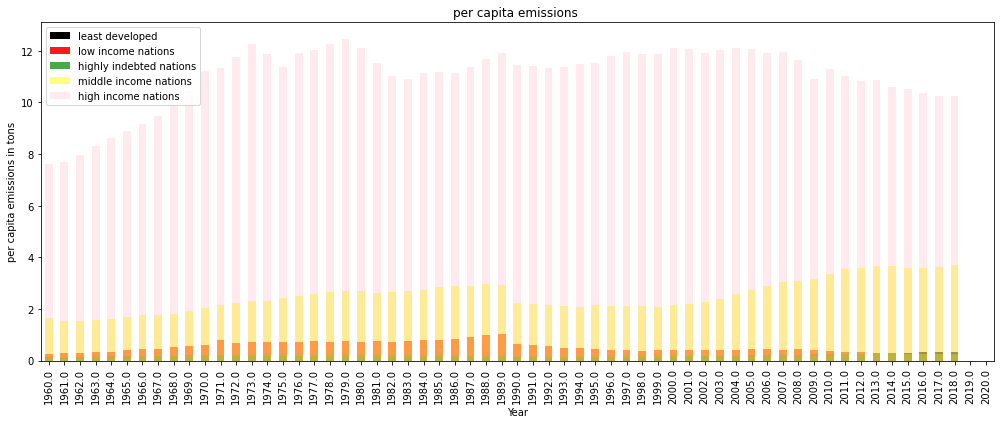

In [2221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

plt.xticks(rotation=90)

df_least_developed_per_capita.plot(kind="bar", color= "black", alpha= 1, label = "least developed")

df_low_income_per_capita_emissions.plot(kind="bar", color= "red", alpha= 0.9, label = "low income nations")

plt.legend(loc= "upper right")
ax1.set_ylabel("per capita emissions", color="black")
df_indebted_per_capita_emissions.plot(kind = "bar", color= "green", alpha= 0.7, label= "highly indebted nations")


df_middle_per_capita_emissions.plot(kind="bar", color= "yellow", alpha= 0.5, label = "middle income nations")
plt.legend(loc= "upper right")
ax1.set_ylabel("per capita emissions", color="black")
df_rich_per_capita_emissions.plot(kind = "bar", color= "pink", alpha= 0.3, label= "high income nations")

plt.rcParams['figure.figsize'] = (15,9)


plt.xticks(rotation=90)
ax1.set_ylabel("per capita emissions in tons", color="black")

plt.legend()
plt.title("per capita emissions ")

fig.tight_layout()
plt.show()



We can zoom in on the low income, least developed, ad indebted countries. 

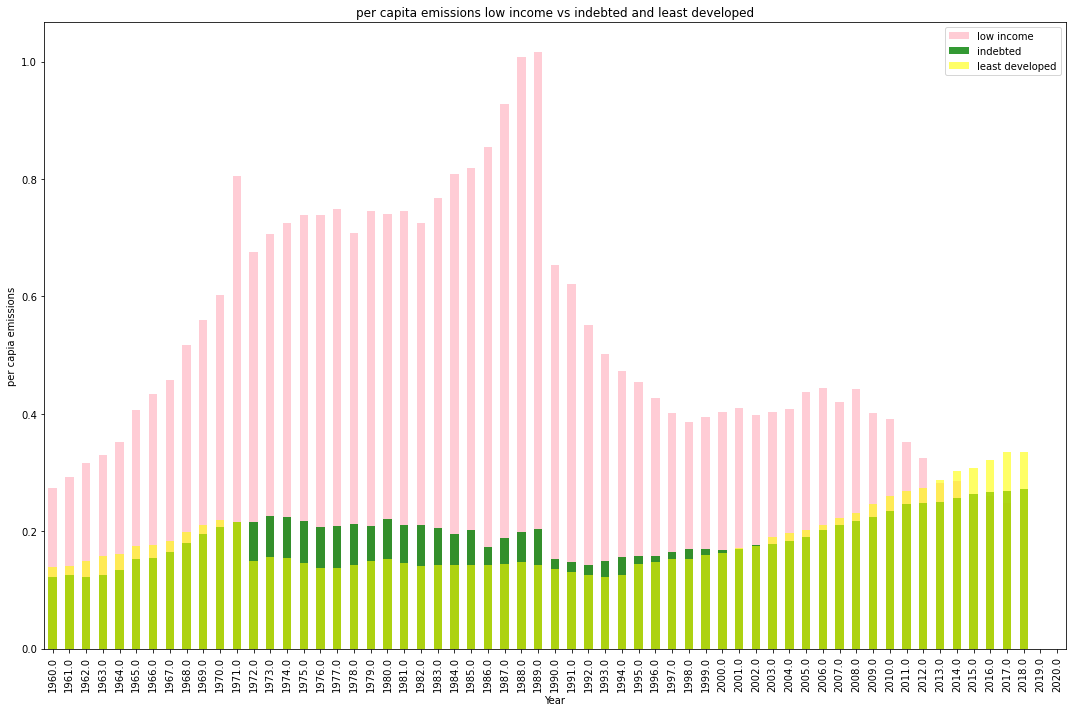

In [1431]:


fig, ax1 = plt.subplots()


plt.xticks(rotation=90)
df_low_income_per_capita_emissions.plot(kind="bar", color= "pink", alpha= 0.8, label = "low income")
plt.legend(loc= "upper right")
ax1.set_ylabel("per capita emissions", color="black")
df_indebted_per_capita_emissions.plot(kind = "bar", color= "green", alpha= 0.8, label= "indebted")
df_least_developed_per_capita.plot(kind="bar", color= "yellow", alpha= 0.6, label = "least developed")

plt.rcParams['figure.figsize'] = (15, 9)


plt.xticks(rotation=90)
ax1.set_ylabel("per capia emissions", color="black")

plt.legend()
plt.title("per capita emissions low income vs indebted and least developed")

fig.tight_layout()
plt.show()


### We can look at the countries with the maximum and minimum per capita emissions. 

In [1432]:
y=final7.loc[final7['Year'] == 2018]

maxi= y[["Value_of_Emissions","Area"]].Value_of_Emissions.max()


maxi_country= final7[["Value_of_Emissions", "Country Name"]].loc[(final7["Value_of_Emissions"]==maxi)]


print("The current maximum emissions are "+ str(maxi) + " in Qatar.")


The current maximum emissions are 32.4156391708326 in Qatar.


In [1433]:
mini= y[["Value_of_Emissions","Area"]].Value_of_Emissions.min()


mini_country= final7[["Value_of_Emissions", "Country Name"]].loc[(final7["Value_of_Emissions"]==mini)]


print("The current minimum emissions are "+ str(mini) + " in  Congo.")


The current minimum emissions are 0.0261692628875174 in  Congo.


In [2222]:


final_for_min_max= final3[["Value_of_Emissions", "Country Name"]].groupby(by= "Country Name").Value_of_Emissions.mean()
final_for_min_max= final_for_min_max.sort_values()

best= final_for_min_max.head(1)

print("The country with the lowest average emissions is  Burundi with 0.032085")

The country with the lowest average emissions is  Burundi with 0.032085


In [1435]:
final_for_min_max= final3[["Value_of_Emissions", "Country Name"]].groupby(by= "Country Name").Value_of_Emissions.mean()
final_for_min_max= final_for_min_max.sort_values()
final_for_min_max= final_for_min_max.dropna()
worst= final_for_min_max.tail(1)

print("The country with the highest average emissions is Qatar with 45.658401")

The country with the highest average emissions is Qatar with 45.658401


# Part Four: Population

### We can take a look at the world population. 

The average world population over the last 60 years is: 5301718132


The population has grown by 4729464076 people since 1960.

This represents a growth of 155%


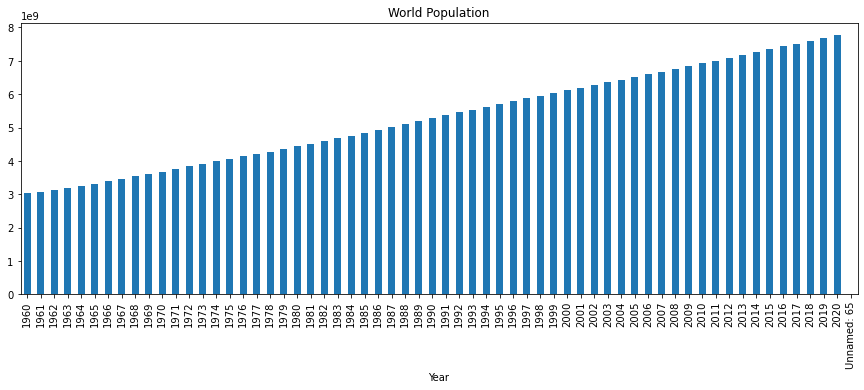

In [2223]:
#graph population of earth


average_world_pop= population2[["Country Name", "Year", "Population"]].loc[(population2["Country Name"] =="World")].groupby(by="Year").Population.sum()
average_world_pop.plot(kind="bar", figsize=(15, 5), title = "World Population")

average_world_number_pop= final2[["Country Name", "Year", "Population"]].loc[(final2["Country Name"] =="World")].Population.mean()
rounded_average_world_number_pop = round(average_world_number_pop)
print("The average world population over the last 60 years is: " + str(rounded_average_world_number_pop))
print("\n")

min_world_number_pop= final2[["Country Name", "Year", "Population"]].loc[(final2["Country Name"] =="World")].Population.min()
max_world_number_pop= final2[["Country Name", "Year", "Population"]].loc[(final2["Country Name"] =="World")].Population.max()
change_in_pop= int((max_world_number_pop - min_world_number_pop))
change_percent = 100* change_in_pop/min_world_number_pop
change_percent = int(change_percent)

print("The population has grown by " + str(change_in_pop) + " people since 1960.\n")
print("This represents a growth of " + str(change_percent) + "%")


We can look at any country to see how the populaiton has changed. 

Enter a country: Egypt
Egypt
the average population over the last 60 years in Egypt is: 58277667
The percent of the world populaiton that lives in Egypt is: 1.0992%


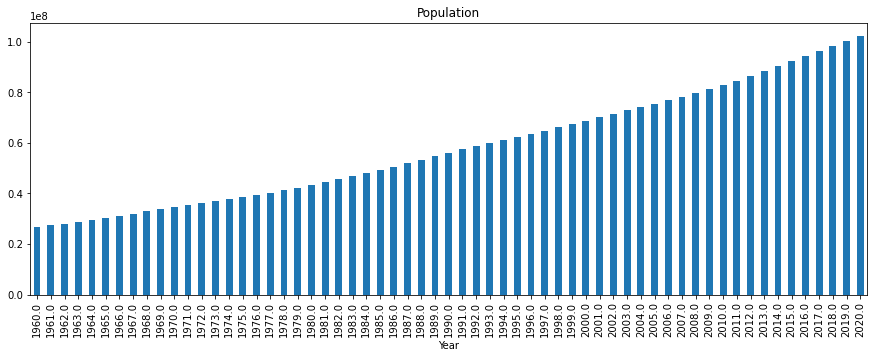

In [1983]:
#population of any country

#accept user input
val2= input("Enter a country: ")
print(val2)


df_country3= final2[["Country Name", "Year", "Population"]].loc[(final["Country Name"] ==val2)].groupby(by="Year").Population.mean()

df_country3.plot(kind="bar",figsize=(15, 5), title = "Population")


#claculate average
average_country_pop= final2[["Country Name", "Year", "Population"]].loc[(final2["Country Name"] ==val2)].Population.mean()

rounded_average_country_pop = round(average_country_pop)
print("the average population over the last 60 years in " + str(val2) + " is: " + str(rounded_average_country_pop))


Percent_world_country = round(100*(rounded_average_country_pop/rounded_average_world_number_pop),4)
print("The percent of the world populaiton that lives in " + str(val2) + " is: " +str(Percent_world_country) + "%")


### We can see the change in populaiton of the continents ove the past 60 years.

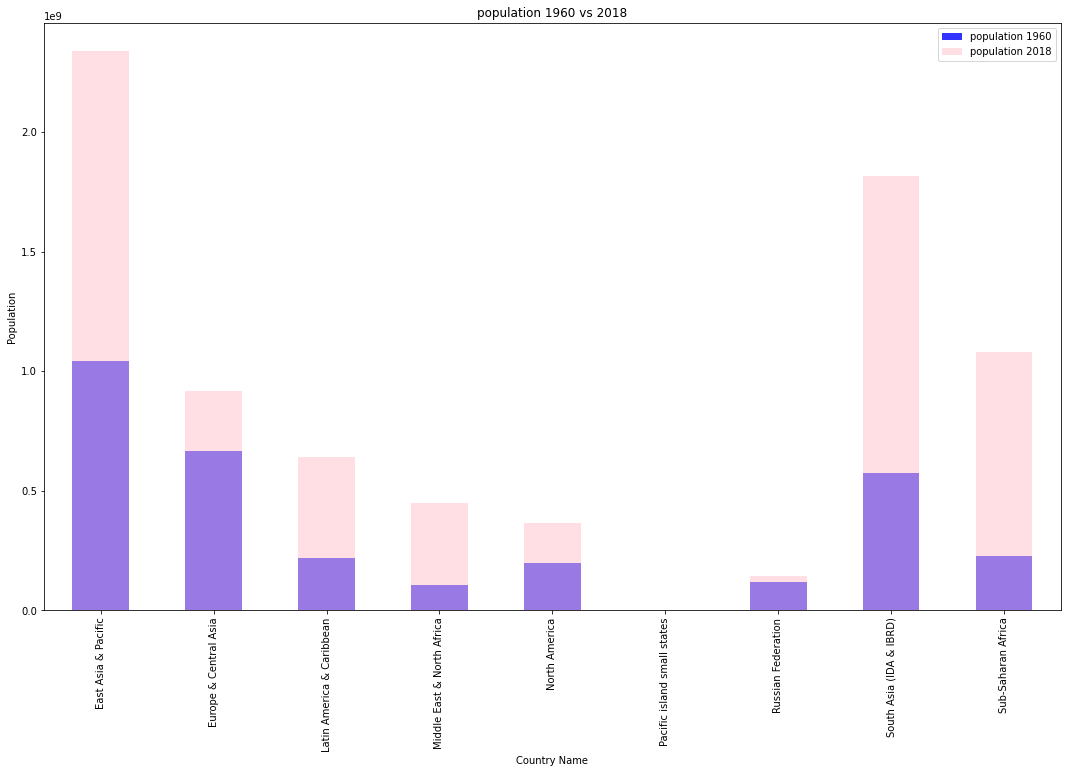

In [1440]:

fig, ax1 = plt.subplots()

plt.xticks(rotation=90)

plt.rcParams['figure.figsize'] = (10,6)

plt.xticks(rotation=90)
ax1.set_ylabel("population", color="black")

plt.legend()
plt.title("population 1960 vs 2018")

fig.tight_layout()

total_continental_Population_1960=  df_continents.loc[(df_continents["Year"]==1960)].groupby(["Country Name"]).Population.sum()

total_continental_Population_1960.plot(kind="bar", color= "blue", alpha= 0.8, label = "population 1960")

plt.legend(loc= "upper right")
ax1.set_ylabel("Population", color="black")

total_continental_Population_2018=  df_continents.loc[(df_continents["Year"]==2018)].groupby(["Country Name"]).Population.sum()

total_continental_Population_2018.plot(kind="bar", color= "pink", alpha= 0.5, label= "population 2018")
plt.legend()
plt.show()


We can look at the populaiton based on income groups. 

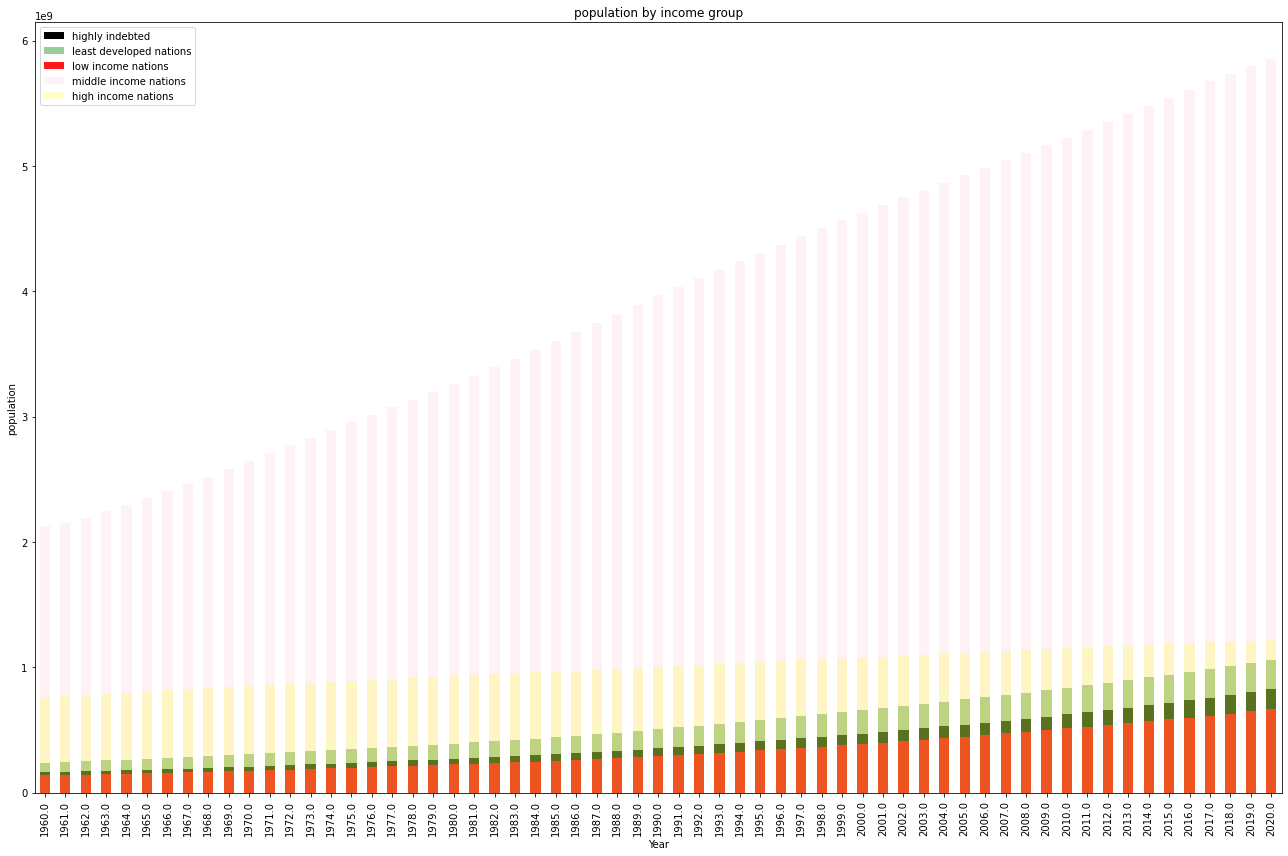

In [1442]:

fig, ax1 = plt.subplots()

plt.xticks(rotation=90)

df_low_idebted.plot(kind= "bar", color= "black", alpha= 1, label = "highly indebted")
df_least_developed_populaiton.plot(kind = "bar", color= "green", alpha= 0.4, label= "least developed nations")
df_low_income_populaiton.plot(kind="bar", color= "red", alpha= 0.9, label = "low income nations")
plt.legend(loc= "upper right")
ax1.set_ylabel("total emissions", color="black")


df_middle_income_populaiton.plot(kind="bar", color= "pink", alpha= 0.2, label = "middle income nations")
plt.legend(loc= "upper right")
ax1.set_ylabel("per capita emissions", color="black")
df_rich_population.plot(kind = "bar", color= "yellow", alpha= 0.2, label= "high income nations")

plt.rcParams['figure.figsize'] = (18,12)


plt.xticks(rotation=90)
ax1.set_ylabel("population", color="black")

plt.legend()
plt.title("population by income group")

fig.tight_layout()
plt.show()


### We can use FbProphet to predict the populaiton  over the next century. 

In [1837]:
#start by getting the dataset in order

average_world_pop_for_prophet= average_world_pop.reset_index(drop= False)

average_world_pop_for_prophet= average_world_pop_for_prophet.drop(61, axis= 0)
average_world_pop_for_prophet["ds"]= pd.to_datetime(average_world_pop_for_prophet['Year'], format='%Y')


average_world_pop_for_prophet= average_world_pop_for_prophet.rename(columns={"Population": "y", "ds": "ds"})
average_world_pop_for_prophet= average_world_pop_for_prophet[["y", "ds"]]



average_world_pop_for_prophet.tail()



,y,ds
56,7.433569e+09,2016-01-01
57,7.519183e+09,2017-01-01
58,7.602454e+09,2018-01-01
59,7.683372e+09,2019-01-01
60,7.761620e+09,2020-01-01


In [1838]:
m= Prophet(interval_width= 0.95)
model = m.fit(average_world_pop_for_prophet)
future= m.make_future_dataframe(periods=100, freq= "Y")
forecast = m.predict(future)



Initial log joint probability = -70.2201
Iteration  1. Log joint probability =    115.921. Improved by 186.141.
Iteration  2. Log joint probability =    161.366. Improved by 45.4445.
Iteration  3. Log joint probability =    200.333. Improved by 38.9678.
Iteration  4. Log joint probability =    235.746. Improved by 35.4124.
Iteration  5. Log joint probability =    242.695. Improved by 6.94963.
Iteration  6. Log joint probability =    242.839. Improved by 0.143895.
Iteration  7. Log joint probability =    243.064. Improved by 0.224892.
Iteration  8. Log joint probability =    243.385. Improved by 0.320475.
Iteration  9. Log joint probability =    243.623. Improved by 0.238417.
Iteration 10. Log joint probability =    244.244. Improved by 0.620544.
Iteration 11. Log joint probability =    244.476. Improved by 0.232453.
Iteration 12. Log joint probability =    244.614. Improved by 0.137986.
Iteration 13. Log joint probability =    244.753. Improved by 0.138522.
Iteration 14. Log joint pro

Here we have a graph sghowing the population trends over the past 60 years along wiht a prediciton range up to 2116. 

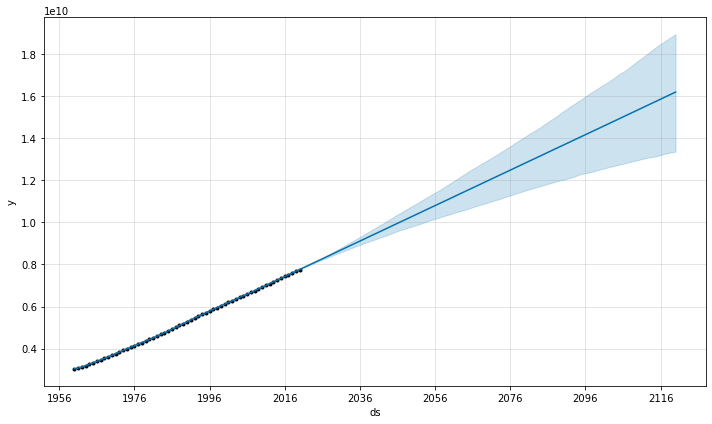

In [1839]:

plot1=m.plot(forecast)



In [1843]:
forecast_shortened= forecast[["ds", "yhat"]]
forecast_shortened.to_csv("forecast_of_future_population_short2.csv")



It shows the current populaiton just shy of 8 billion, and a prediction that the populaiton of the Earth will keep going up to as much as 20 billion people. 

## Let's find out when the world's population will exceed 10 billion people.

In [1446]:
over_ten_bill= forecast.loc[(forecast["yhat"]>9999999999)].head(1)
over_ten_bill_year= over_ten_bill[["ds", "yhat"]]
over_ten_bill_year.head(1)

,ds,yhat
87,2046-12-31,1.004088e+10


### Based on our model, the world population should esceed 10 billion in 2046. 

### When will the populaiton exceed a given number? We'll input a population and find out when that happens. 

In [1455]:
print("chosee a population in billions. (for example, for 12 billion people, input 12)")
a= input("enter a number of billions of people \n")
a=float(a)
a_bill= float(a*1000000000)
forecast.dtypes
over_num_bill= forecast.loc[(forecast["yhat"]>a_bill)].head(1)
over_num_bill_year= over_num_bill[["ds", "yhat"]]
over_num_bill_year.head(1)

chosee a population in billions. (for example, for 12 billion people, input 12)
enter a number of billions of people 
16.15


,ds,yhat
160,2119-12-31,1.619905e+10


## Now we''ll take a look at thge populaiton of individual countries. 

In [1456]:
population_for_prophet= final8[["Area", "Year", "Population"]]


population_for_prophet.reset_index(drop=False)
#population_for_prophet.drop(["Country_Code_x"],  axis=1, inplace = True)


population_for_prophet = population_for_prophet.rename(columns={'Area': 'Area', 'Population': 'y', "Year":"ds"})

population_for_prophet = population_for_prophet.astype({"ds": int, "y": float, "Area":str })


## You can input a country to see the prediction for the future population. 

In [1458]:

a=input("input a country ")

population_for_prophet_specific= population_for_prophet[["Area", "y", "ds"]].loc[(population_for_prophet["Area"]==a)]

population_for_prophet_specific.reset_index(drop=True)
population_for_prophet_specific.drop(["Area"],  axis=1, inplace = True)
m= Prophet(interval_width= 0.95)
model = m.fit(population_for_prophet_specific)
future= m.make_future_dataframe(periods=100, freq= "Y")
forecast = m.predict(future)

input a country Syrian Arab Republic

Initial log joint probability = -67.875
Iteration  1. Log joint probability =    55.6304. Improved by 123.505.
Iteration  2. Log joint probability =     96.846. Improved by 41.2156.
Iteration  3. Log joint probability =    124.234. Improved by 27.3882.
Iteration  4. Log joint probability =    127.522. Improved by 3.288.
Iteration  5. Log joint probability =    133.408. Improved by 5.8859.
Iteration  6. Log joint probability =    133.423. Improved by 0.0146865.
Iteration  7. Log joint probability =    133.443. Improved by 0.0200814.
Iteration  8. Log joint probability =    133.682. Improved by 0.239215.
Iteration  9. Log joint probability =    134.328. Improved by 0.645827.
Iteration 10. Log joint probability =    134.444. Improved by 0.115908.
Iteration 11. Log joint probability =     134.46. Improved by 0.0165978.
Iteration 12. Log joint probability =    134.472. Improved by 0.0117652.
Iteration 13. Log joint probability =    134.476. Improved by 

Syrian Arab Republic


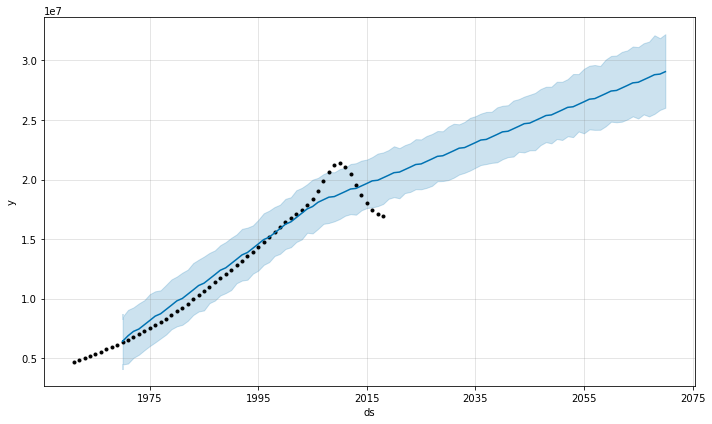

In [1459]:


plot1=m.plot(forecast)

print(a)


# Part Five: Total Emisisons

Note the scale on the y-axis of the graphs. 1x10^ 9 = 1 billion

The current yearly average total emissions are: 34041045974

In 1961 the average total emissions were: 9463838500

This reporesents an increase of 259.7%


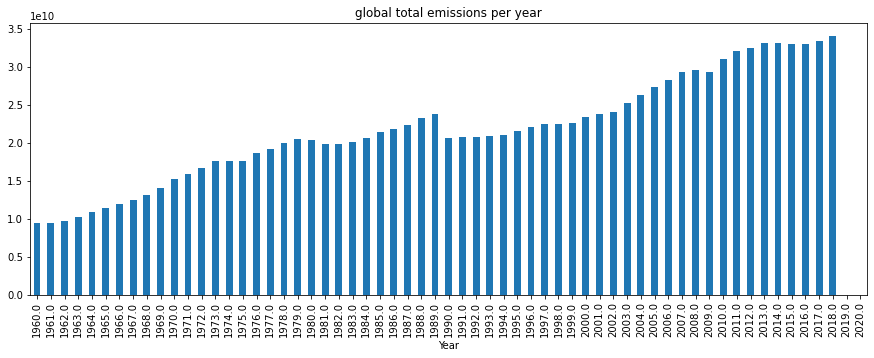

In [2224]:
df_world_emissions= final2[["Country Name", "Year", "Total_emissions"]].loc[(final2["Country Name"] =="World")].groupby(by="Year").Total_emissions.sum()

df_world_emissions.plot(kind= "bar", figsize=(15, 5), title = "global total emissions per year")


total_av= final3.loc[final3['Year'] == 2018, ['Total_emissions']]

y=final2.loc[final2['Year'] == 2018].loc[(final2["Country Name"]=="World")]


mean_gloabl_emissions_total = y["Total_emissions"].mean()
rounded_meangloabl_emissions_total= round(mean_gloabl_emissions_total)

print("The current yearly average total emissions are: " + str(rounded_meangloabl_emissions_total)+ "\n" )

total_av_1960= final3.loc[final3['Year'] == 1961, ['Total_emissions']]

y_1960=final2.loc[final2['Year'] == 1960].loc[(final2["Country Name"]=="World")]

mean_gloabl_emissions_total_1960 = y_1960["Total_emissions"].mean()
rounded_meangloabl_emissions_total_1960= round(mean_gloabl_emissions_total_1960)

print("In 1961 the average total emissions were: " + str(rounded_meangloabl_emissions_total_1960)+ "\n" )

percent_cahnge_total= round(((rounded_meangloabl_emissions_total-rounded_meangloabl_emissions_total_1960)/rounded_meangloabl_emissions_total_1960)*100,1)
print("This reporesents an increase of " + str(percent_cahnge_total) + "%")



<AxesSubplot:title={'center':'US  total emissions per year'}, xlabel='Year'>

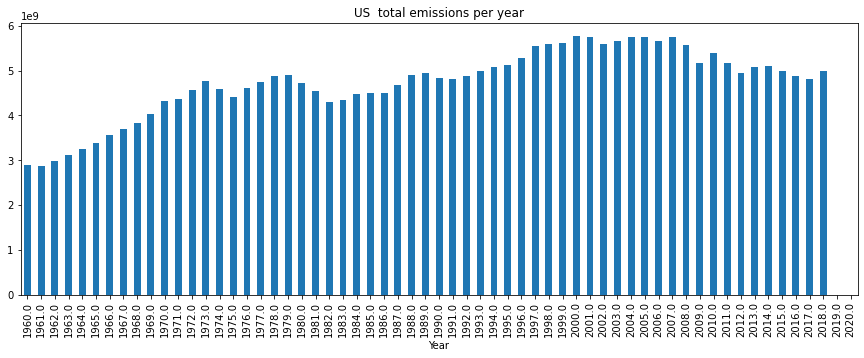

In [2225]:
#Graph us total emissions


df_usa= final2[["Country Name", "Year", "Total_emissions"]].loc[(final2["Country Name"] =="United States")].groupby(by="Year").Total_emissions.mean()

df_usa.plot(kind= "bar", figsize=(15, 5), title = "US  total emissions per year")





Choose a country to see their total emissions and how they comapre to the US.

Input the name of a country 
South Korea


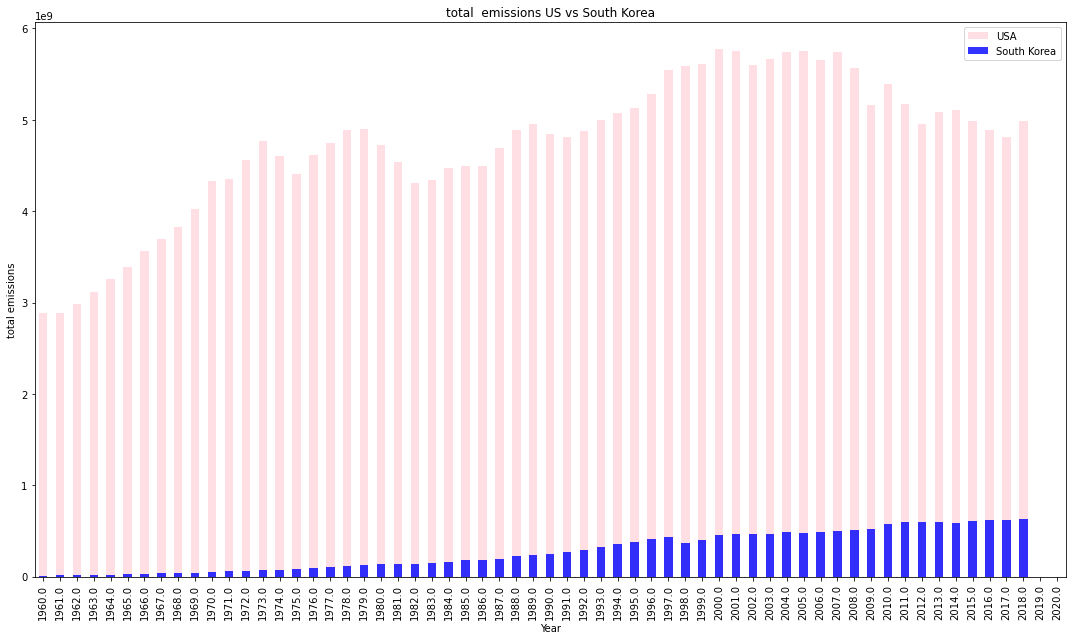

In [2226]:

fig, ax1 = plt.subplots()


plt.xticks(rotation=90)

plt.legend(loc= "upper right")
ax1.set_ylabel("total emissions", color="black")

plt.rcParams['figure.figsize'] = (10,8)

valc= input("Input the name of a country \n")
df_usa= final2[["Country Name", "Year", "Total_emissions"]].loc[(final2["Country Name"] =="United States")].groupby(by="Year").Total_emissions.mean()

df_usa.plot(kind= "bar", color= "pink", alpha= 0.5, label = "USA" )

df_given_country=  final2[["Country Name", "Year", "Total_emissions"]].loc[(final2["Country Name"] ==valc)].groupby(by="Year").Total_emissions.mean()
df_given_country.plot(kind="bar", color= "blue", alpha= 0.8, label = str(valc))

plt.xticks(rotation=90)
ax1.set_ylabel("total emissions", color="black")

plt.legend()
plt.title("total  emissions US vs " +str(valc))

fig.tight_layout()
plt.show()

Choose any two countries to comapre to each other

input a country: 
North Korea
Input another country 
South Korea


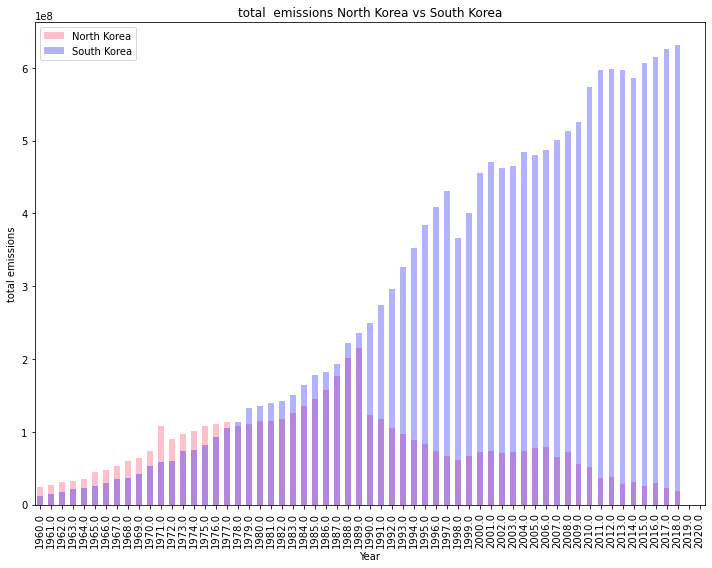

In [2227]:

fig, ax1 = plt.subplots()


plt.xticks(rotation=90)

plt.legend(loc= "upper right")
ax1.set_ylabel("total emissions", color="black")

plt.rcParams['figure.figsize'] = (10,8)

valc2= input("input a country: \n")

df_given_country2= final2[["Country Name", "Year", "Total_emissions"]].loc[(final2["Country Name"] ==valc2)].groupby(by="Year").Total_emissions.mean()

df_given_country2.plot(kind= "bar", color= "pink", alpha= 1, label = str(valc2) )


valc= input("Input another country \n")

df_given_country=  final2[["Country Name", "Year", "Total_emissions"]].loc[(final2["Country Name"] ==valc)].groupby(by="Year").Total_emissions.mean()
df_given_country.plot(kind="bar", color= "blue", alpha= 0.3, label = str(valc))

plt.xticks(rotation=90)
ax1.set_ylabel("total emissions", color="black")

plt.legend()
plt.title("total  emissions " + str(valc2) + " vs " +str(valc))

fig.tight_layout()
plt.show()

In [2228]:

#drop na values

final5= final4.dropna()

final3= final2.dropna()


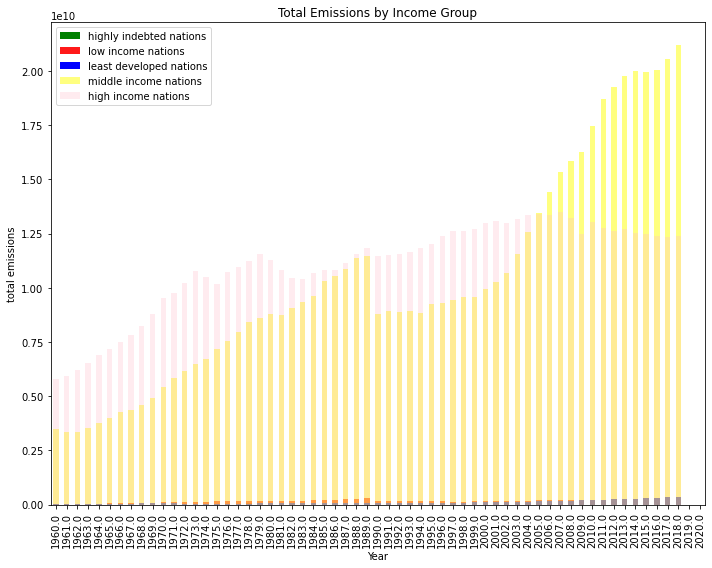

In [2135]:

#df_low_income_per_capita_emissions
#df_middle_per_capita_emissions
#df_indebted_per_capita_emissions
#df_rich_per_capita_emissions
#df_indebted_emissions
#df_rich_emissions

df_least_developed_total= final2[["Country Name", "Year", "Total_emissions"]].loc[(final2["Country Name"] =="Least developed countries: UN classification")].groupby(by="Year").Total_emissions.mean()

fig, ax1 = plt.subplots()

plt.xticks(rotation=90)
df_indebted_emissions.plot(kind = "bar", color= "green", alpha= 1, label= "highly indebted nations")
df_low_income_total_emissions.plot(kind="bar", color= "red", alpha= 0.9, label = "low income nations")
plt.legend(loc= "upper right")
ax1.set_ylabel("total emissions", color="black")

df_least_developed_total.plot(kind = "bar", color= "blue", alpha= 1, label= "least developed nations")

df_middle_total_emissions.plot(kind="bar", color= "yellow", alpha= 0.5, label = "middle income nations")
plt.legend(loc= "upper right")
ax1.set_ylabel("per capita emissions", color="black")
df_rich_emissions.plot(kind = "bar", color= "pink", alpha= 0.3, label= "high income nations")

plt.rcParams['figure.figsize'] = (8,8)

plt.xticks(rotation=90)
ax1.set_ylabel("total emissions", color="black")

plt.legend()
plt.title("Total Emissions by Income Group")

fig.tight_layout()
plt.show()



### We see that high income and middle income countries account for the vast majority of all emissions.

#### Let's zoom in on the lower income countries to see how they compare to each other. 

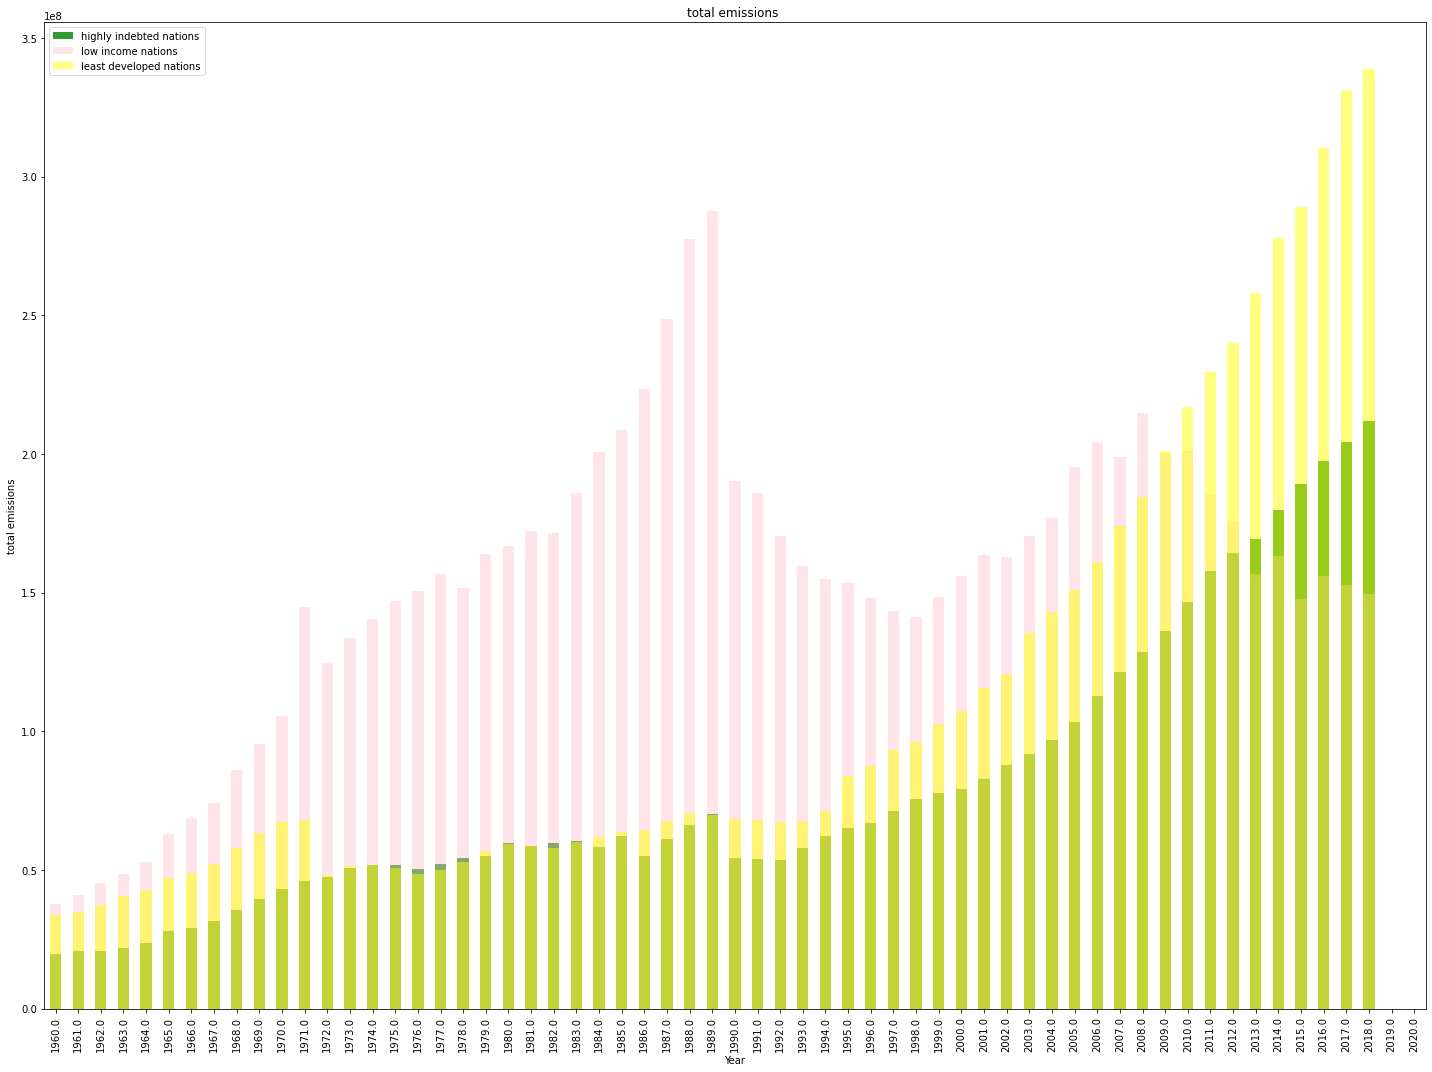

In [1474]:
fig, ax1 = plt.subplots()

plt.xticks(rotation=90)
df_indebted_emissions.plot(kind = "bar", color= "green", alpha= .8, label= "highly indebted nations")
df_low_income_total_emissions.plot(kind="bar", color= "pink", alpha= 0.4, label = "low income nations")
plt.legend(loc= "upper right")
ax1.set_ylabel("total emissions", color="black")

df_least_developed_total.plot(kind = "bar", color= "yellow", alpha= 0.5, label= "least developed nations")


ax1.set_ylabel("per capita emissions", color="black")

plt.rcParams['figure.figsize'] = (10,8)


plt.xticks(rotation=90)
ax1.set_ylabel("total emissions", color="black")

plt.legend()
plt.title("total emissions ")

fig.tight_layout()
plt.show()

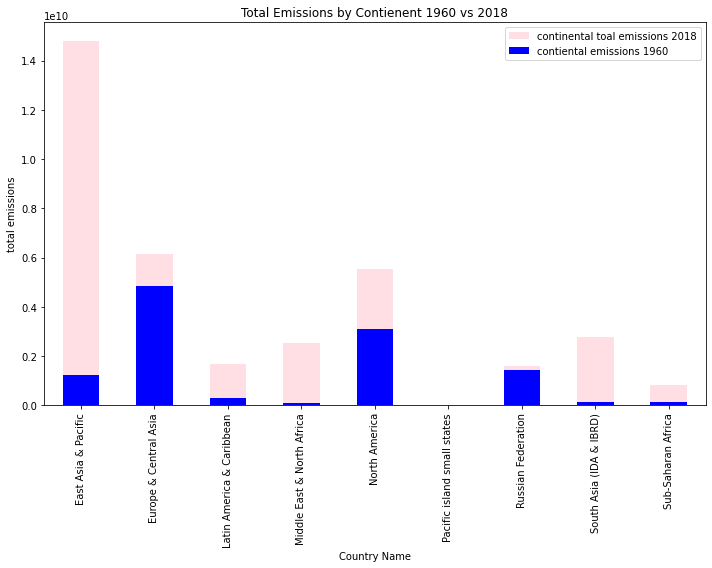

In [1477]:
fig, ax1 = plt.subplots()

plt.xticks(rotation=90)

total_continental_emnissions_2018=  df_continents.loc[(df_continents["Year"]==2018)].groupby(["Country Name"]).Total_emissions.sum()



total_continental_emnissions_2018.plot(kind = "bar", color= "pink", alpha= 0.5, label= "continental toal emissions 2018")
plt.legend(loc= "upper right")


total_continental_emnissions_1960=  df_continents.loc[(df_continents["Year"]==1960)].groupby(["Country Name"]).Total_emissions.sum()
total_continental_emnissions_1960.plot(kind = "bar", color= "blue", alpha= 1, label = "contiental emissions 1960")

plt.rcParams['figure.figsize'] = (10,8)

plt.xticks(rotation=90)
ax1.set_ylabel("total emissions", color="black")

plt.legend()
plt.title("Total Emissions by Contienent 1960 vs 2018")

fig.tight_layout()
plt.show()





Let's comapre populaiton to total emissions


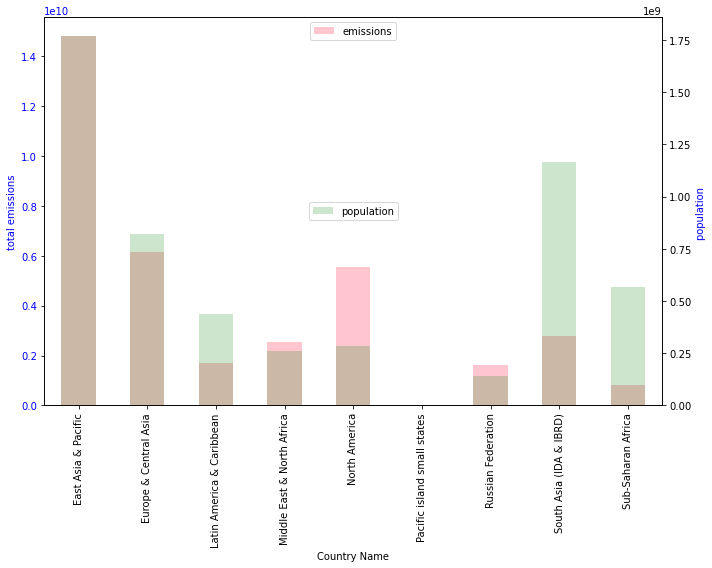

In [1478]:
fig, ax1 = plt.subplots()


ax1.set_ylabel("total emissions", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.tick_params(axis='x', labelcolor= "black")
#plt.xticks(total_continental_emnissions.index,least_developed["Year"].values)
plt.xticks(rotation=90)
total_continental_emnissions_2018.plot(kind="bar", color= "pink", alpha= 0.9, label = "emissions")
plt.legend(loc= "upper center")
ax2 = ax1.twinx()
ax2.set_ylabel("population ", color="blue")
total_continental_population2.plot(kind = "bar", color= "green", alpha= 0.2, label = "population")

plt.rcParams['figure.figsize'] = (10,8)

plt.xticks(rotation=90)

plt.legend(loc= "center")

fig.tight_layout()
plt.show()


We see here that North America has a disproportiante amouth of emissions for its populaiton, while South Asia and Sub-Saharan Africa have relatively low total emissions compared to theri populaiton. 

# Part Five: Analysis
## We will see how population, emissions, and temperature change relate to each other

In [2229]:
import seaborn as sns


final8= final7.dropna()


Let's create a heat map that shows how the numbers relate to each other

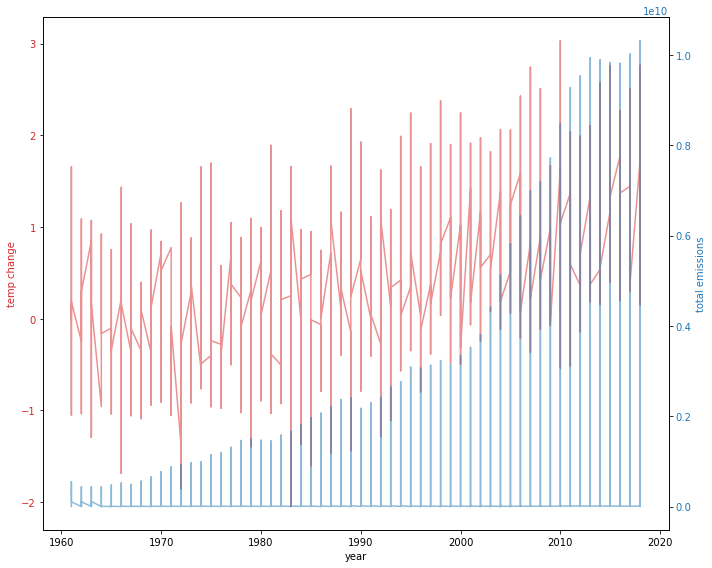

In [1480]:

# map each elemnt to the others
t = final3["Year"]
data1 = final3["Value"]
data2 = final3["Total_emissions"]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_ylabel('temp change', color=color)
ax1.plot(t, data1, color=color, alpha=0.5)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('total emissions', color=color)  
ax2.plot(t, data2, color=color, alpha=0.5)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()


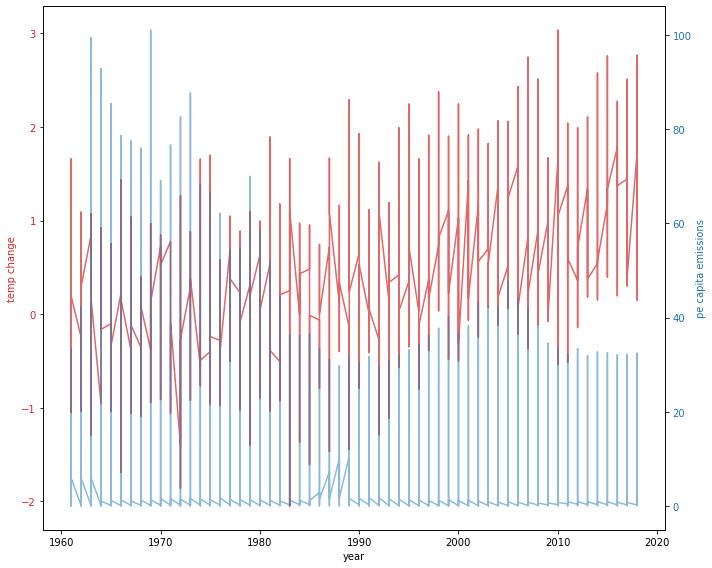

In [1481]:
# map each elemnt to the others
t = final3["Year"]
data1 = final3["Value"]
data2 = final3["Value_of_Emissions"]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_ylabel('temp change', color=color)
ax1.plot(t, data1, color=color, alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('pe capita emissions', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color, alpha=0.5)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


We see that total emissons affect temperature change more than per capita emissions. Per capita emissions have decreased on average, but with a growing populaiton, the drop in per capita emissions does not translate to a drop in total emissions.

In [1482]:

df =pd.DataFrame(data=final8, columns=["Year", "Population","Value_of_Emissions", "Total_emissions", "Value", ])


When we look for correlations, we see year and value, meaning temperature change, are closely correlated, as are population and total emissions. 

When we do a regression analysis on teh raw data, we see that there is little connection between populaiton, emissions, and temperatrue cange on a country-by-coutnry level. This is because meiisions and temeprature change are a global phenomenon, and the emissions of one country will affetc another. We must look at the data in a different manner to see teh connections. 

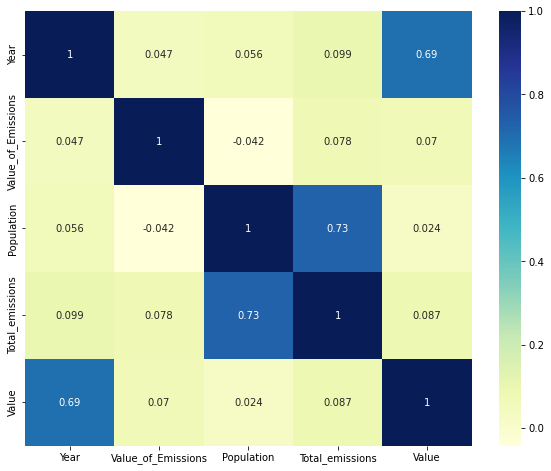

In [1483]:

df_2= final8.corr(method='pearson')

go=sns.heatmap(df_2, annot=True, cmap="YlGnBu")

plt.rcParams['figure.figsize'] = (8,6)

ax = go


If we use our continental areas, rather than all countries, we get this heatmap. 


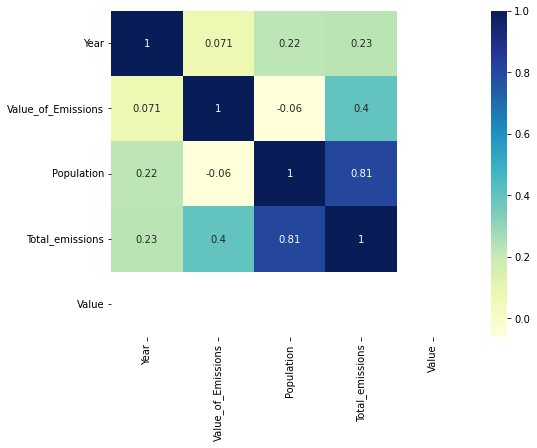

In [1484]:

df_2= areas.corr(method='pearson')
plt.rcParams['figure.figsize'] = (8,6)

go=sns.heatmap(df_2, annot=True, cmap="YlGnBu")

ax = go



This shows us that total emissions and populaiton are related. However, this is still not adequate to describe climate change. 


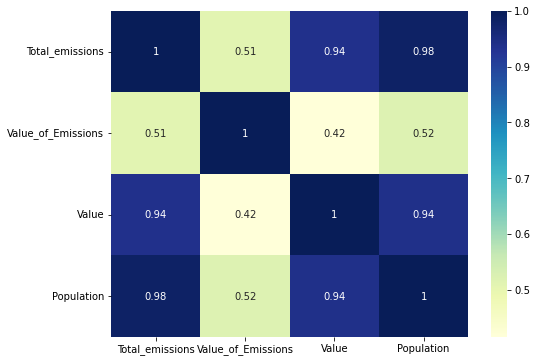

In [1500]:

world_for_sns2=final8[["Year", "Total_emissions", "Value_of_Emissions", "Value", "Population"]].groupby(by="Year").agg({'Total_emissions':'sum', 'Value_of_Emissions':'mean','Value':'mean', 'Population':"sum"})
world_for_sns2.head()

df_3= world_for_sns2.corr(method='pearson')
plt.rcParams['figure.figsize'] = (8,6)

go=sns.heatmap(df_3, annot=True, cmap="YlGnBu")

ax = go




When we look on a global scale, we see the correlations between emissions and temperature change (Value). 

Emissions are cumulative, so we need to add another data column: the running total of emissions. 

The current yearly average total emissions are: 1341145810



In [2230]:

final7["Total_emissions"]= final7["Value_of_Emissions"] * final7["Population"]


/var/folders/bc/88y__jqx7s591njj3c2hmjn40000gn/T/ipykernel_993/2570340759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final7["Total_emissions"]= final7["Value_of_Emissions"] * final7["Population"]


In [2231]:

world_dataset= final3[["Country Name", "Year", "Population", "Value_of_Emissions", "Total_emissions", "Value"]].loc [(final3["Country Name"]=="World")].groupby(by="Year")


world1= final7.reset_index()
#world_dataset= world1[["Year", "Value_of_Emissions","Population", "Total_emissions", "Value"  ]].groupby(by="Year").sum(["Population", "Total_emissions", "Value_of_Emissions","Value"])
world_dataset2= world1[["Year", "Value_of_Emissions","Population", "Total_emissions", "Value"  ]].groupby(by="Year").agg({'Value_of_Emissions':'mean','Population':'sum','Total_emissions':'sum', "Value" : 'mean'})

world_dataset2["running_total"]=world_dataset2["Total_emissions"].cumsum()

world_dataset2.head()



,Value_of_Emissions,Population,Total_emissions,Value,running_total
Year,,,,,
1960.0,2.110012,3.594294e+09,8.260204e+09,NaN,8.260204e+09
1961.0,2.256416,3.645463e+09,8.235764e+09,0.140285,1.649597e+10
1962.0,2.357039,3.710603e+09,8.514600e+09,-0.023388,2.501057e+10
1963.0,2.980773,3.788312e+09,8.995333e+09,-0.021649,3.400590e+10
1964.0,3.145528,3.866847e+09,9.468456e+09,-0.122946,4.347436e+10


When we make the dataset there were no temperature values, so we need to caluclate them by taking the average. We also need to add in the cumulative sum of emissions. becasue temerpature change has to do not only with the emissions of one year, but of all prior years, we will llok at the accumulaiton of Co2.

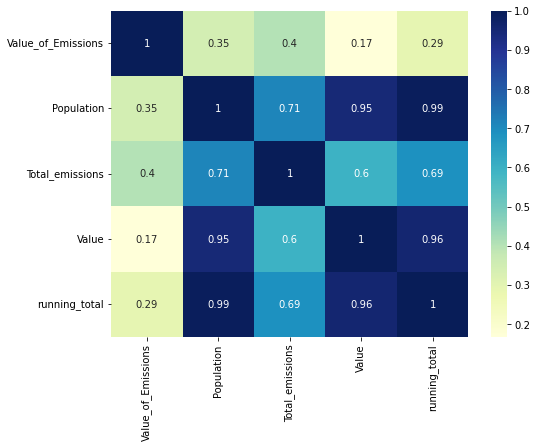

In [1504]:
#making a dataset that's just the world

df_4= world_dataset2.corr(method='pearson')
plt.rcParams['figure.figsize'] = (8,6)

go=sns.heatmap(df_4, annot=True, cmap="YlGnBu")

ax = go


Here we see that the value of temperature change is most highly correlated with the running totoal of emissions. This means that the accumulation of emissions has the largest effect on temperature change.

We can calucualte the r-squared value. 

In [2232]:
x_values = df_4["running_total"]
y_values = df_4["Value"]

correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print("r-squared of total accumulaiton and temp change: " + str(r_squared))


x_values = df_4["Population"]
y_values = df_4["Value"]

correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print("r-squared of Populaiton and temp change: " + str(r_squared))

x_values = df_4["Value_of_Emissions"]
y_values = df_4["Value"]

correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print("r-squared of per capita emissions and temp change: " + str(r_squared))

x_values = df_4["Value_of_Emissions"]
y_values = df_4["Value"]

correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print("r-squared of per capita emissions and temp change: " + str(r_squared))

r-squared of total accumulaiton and temp change: 0.9871563061647295
r-squared of Populaiton and temp change: 0.9810695761587801
r-squared of per capita emissions and temp change: 0.9034059582230648
r-squared of per capita emissions and temp change: 0.9034059582230648


We see that total accumulaiton of Co2  and temperature change have a correlation greater than .98, which means they are extemely correlated.  

Becasue temperature change is so closely tied to emissions, we can create a predictive model to tell us what the temperature change will be given a global Co2 output. 

In [2233]:
#using total emissions to precit temp change
world_dataset3= world_dataset2.dropna()
world_dataset3.tail()

,Value_of_Emissions,Population,Total_emissions,Value,running_total
Year,,,,,
2014.0,4.208126,8.962775e+09,3.502462e+10,1.159287,1.108177e+12
2015.0,4.163782,9.070292e+09,3.491825e+10,1.328599,1.143095e+12
2016.0,4.170604,9.177872e+09,3.497211e+10,1.429848,1.178067e+12
2017.0,4.177661,9.285101e+09,3.552092e+10,1.284744,1.213588e+12
2018.0,4.175293,9.389882e+09,3.634824e+10,1.338155,1.249936e+12


In [2234]:

world_dataset2= world_dataset2.reset_index(drop=False)


In [2235]:
#using total emissions to precit temp change
world_dataset3= world_dataset2.dropna()
world_dataset3.tail()

x = world_dataset3[[ 'running_total']]
y =world_dataset3['Value']

regr = linear_model.LinearRegression()
regr.fit(x, y)

#put in sample predictive values


golbal_preidcted_temp_6= regr.predict([[1.249936e+12]])
print("If the total global output is 1.245 trillion tons , we can expect the temp change to be " + str(golbal_preidcted_temp_6))

golbal_preidcted_temp_7= regr.predict([[1.25e+12]])
print("If the total global output is 1.25 trillion tons , we can expect the temp change to be " + str(golbal_preidcted_temp_7))



golbal_preidcted_temp_3= regr.predict([[1300000000000]])
print("If the total global output is 1.3 trillion tons , we can expect the temp change to be " + str(golbal_preidcted_temp_3))


golbal_preidcted_temp_4= regr.predict([[1400000000000]])
print("If the total global output is 1.4 trillion tons , we can expect the temp change to be " + str(golbal_preidcted_temp_4))

golbal_preidcted_temp_5= regr.predict([[1500000000000]])
print("If the total global output is 1.5 tirllion tons , we can expect the temp change to be " + str(golbal_preidcted_temp_5))





If the total global output is 1.245 trillion tons , we can expect the temp change to be [1.34794897]
If the total global output is 1.25 trillion tons , we can expect the temp change to be [1.34802594]
If the total global output is 1.3 trillion tons , we can expect the temp change to be [1.40815803]
If the total global output is 1.4 trillion tons , we can expect the temp change to be [1.52842221]
If the total global output is 1.5 tirllion tons , we can expect the temp change to be [1.64868638]


Let's use FbProphet to make predictions about the future. We'll start by predicting future emissions.

We use FbProphet to predict future accumulated emissions. 


## Let's us FbProphet to take a look at our predictions for the running totoal of emissions. 

In [2236]:

world_for_prohpet = world_dataset3[["Year", "running_total"]]
                                   



world_for_prohpet = world_for_prohpet.astype({"Year": int, "running_total": int})

world_for_prohpet['ds'] = pd.to_datetime(world_for_prohpet['Year'], format='%Y')
world_for_prohpet.drop([ "Year"], axis=1, inplace= True)



world_for_prohpet = world_for_prohpet.rename(columns={'running_total': 'y', 'ds': 'ds'})
world_for_prohpet.head()



,y,ds
1,16495968264,1961-01-01
2,25010567765,1962-01-01
3,34005900412,1963-01-01
4,43474356662,1964-01-01
5,53461664590,1965-01-01


In [2237]:
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING)




In [2238]:
m= Prophet(interval_width= 0.95)

model = m.fit(world_for_prohpet)


Initial log joint probability = -67.8133
Iteration  1. Log joint probability =     56.758. Improved by 124.571.
Iteration  2. Log joint probability =    95.3474. Improved by 38.5894.
Iteration  3. Log joint probability =    131.286. Improved by 35.9389.
Iteration  4. Log joint probability =    149.765. Improved by 18.4787.
Iteration  5. Log joint probability =     161.18. Improved by 11.4146.
Iteration  6. Log joint probability =    161.254. Improved by 0.0745844.
Iteration  7. Log joint probability =    161.379. Improved by 0.125085.
Iteration  8. Log joint probability =    161.495. Improved by 0.115605.
Iteration  9. Log joint probability =     161.65. Improved by 0.155562.
Iteration 10. Log joint probability =    161.698. Improved by 0.0471505.
Iteration 11. Log joint probability =    161.784. Improved by 0.0864024.
Iteration 12. Log joint probability =     162.25. Improved by 0.465511.
Iteration 13. Log joint probability =    162.374. Improved by 0.124772.
Iteration 14. Log joint 

In [2239]:


future= m.make_future_dataframe(periods=100, freq= "Y")
forecast = m.predict(future)


In [2240]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
153,2113-12-31,4.458406e+12,3.561165e+12,5.456019e+12,3.536861e+12,5.432315e+12,2.382521e+10,2.382521e+10,2.382521e+10,2.382521e+10,2.382521e+10,2.382521e+10,0.0,0.0,0.0,4.482231e+12
154,2114-12-31,4.492067e+12,3.576592e+12,5.512337e+12,3.552455e+12,5.487014e+12,2.675928e+10,2.675928e+10,2.675928e+10,2.675928e+10,2.675928e+10,2.675928e+10,0.0,0.0,0.0,4.518826e+12
155,2115-12-31,4.525728e+12,3.600062e+12,5.563066e+12,3.568041e+12,5.531785e+12,3.063264e+10,3.063264e+10,3.063264e+10,3.063264e+10,3.063264e+10,3.063264e+10,0.0,0.0,0.0,4.556361e+12
156,2116-12-31,4.559481e+12,3.605332e+12,5.592349e+12,3.583667e+12,5.572050e+12,2.171217e+10,2.171217e+10,2.171217e+10,2.171217e+10,2.171217e+10,2.171217e+10,0.0,0.0,0.0,4.581193e+12
157,2117-12-31,4.593142e+12,3.621051e+12,5.644476e+12,3.599266e+12,5.620470e+12,2.382521e+10,2.382521e+10,2.382521e+10,2.382521e+10,2.382521e+10,2.382521e+10,0.0,0.0,0.0,4.616968e+12


Here we see predictions for the total accumulated amount of Co2. We will put this into a regression analysis to make a prediciton about global climate change and to see how it compares to the model we made with FbProphet. 

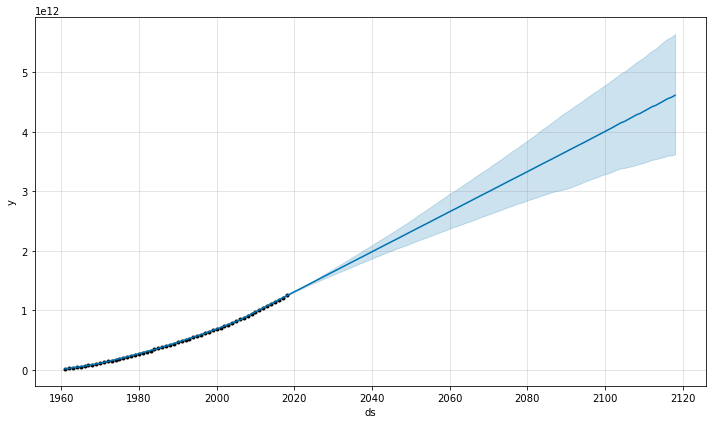

In [2241]:

plot1=m.plot(forecast)

In [2242]:
forecast_data= forecast[["ds", "yhat"]]
forecast_data.tail()

,ds,yhat
153,2113-12-31,4.482231e+12
154,2114-12-31,4.518826e+12
155,2115-12-31,4.556361e+12
156,2116-12-31,4.581193e+12
157,2117-12-31,4.616968e+12


We use the regression model we made earlier to put in our predicted values of total emissions. These allow us to put in a year and get the predicted temerpature change out. 

In [2243]:


x = world_dataset3[['running_total']]
y =world_dataset3['Value']

regr = linear_model.LinearRegression()
regr.fit(x, y)

#extract  predictive values from forecaast



a_row = forecast_data[forecast_data["ds"] == "2030-12-31"]
z= a_row["yhat"]
z=int(z)
golbal_preidcted_temp_forecast= regr.predict([[z]])
print("In 2030, we can expect the temp change to be " + str(golbal_preidcted_temp_forecast))


a_row = forecast_data[forecast_data["ds"] == "2033-12-31"]
z= a_row["yhat"]
z=int(z)
golbal_preidcted_temp_forecast= regr.predict([[z]])
print("In 2033, we can expect the temp change to be " + str(golbal_preidcted_temp_forecast))

a_row = forecast_data[forecast_data["ds"] == "2040-12-31"]
z= a_row["yhat"]
z=int(z)
golbal_preidcted_temp_forecast= regr.predict([[z]])
print("In 2040, we can expect the temp change to be " + str(golbal_preidcted_temp_forecast))


a_row = forecast_data[forecast_data["ds"] == "2050-12-31"]
z= a_row["yhat"]
z=int(z)
golbal_preidcted_temp_forecast= regr.predict([[z]])
print("In 2050, we can expect the temp change to be " + str(golbal_preidcted_temp_forecast))


a_row = forecast_data[forecast_data["ds"] == "2060-12-31"]
z= a_row["yhat"]
z=int(z)
golbal_preidcted_temp_forecast= regr.predict([[z]])
print("In 2060, we can expect the temp change to be " + str(golbal_preidcted_temp_forecast))


a_row = forecast_data[forecast_data["ds"] == "2070-12-31"]
z= a_row["yhat"]
z=int(z)
golbal_preidcted_temp_forecast= regr.predict([[z]])
print("In 2070, we can expect the temp change to be " + str(golbal_preidcted_temp_forecast))

a_row = forecast_data[forecast_data["ds"] == "2080-12-31"]
z= a_row["yhat"]
z=int(z)
golbal_preidcted_temp_forecast= regr.predict([[z]])
print("In 2080, we can expect the temp change to be " + str(golbal_preidcted_temp_forecast))

a_row = forecast_data[forecast_data["ds"] == "2090-12-31"]
z= a_row["yhat"]
z=int(z)
golbal_preidcted_temp_forecast= regr.predict([[z]])
print("In 2090, we can expect the temp change to be " + str(golbal_preidcted_temp_forecast))


a_row = forecast_data[forecast_data["ds"] == "2113-12-31"]
z= a_row["yhat"]
z=int(z)
golbal_preidcted_temp_forecast= regr.predict([[z]])
print("In 2113, we can expect the temp change to be " + str(golbal_preidcted_temp_forecast))


In 2030, we can expect the temp change to be [1.86776811]
In 2033, we can expect the temp change to be [1.98887182]
In 2040, we can expect the temp change to be [2.27241386]
In 2050, we can expect the temp change to be [2.67796473]
In 2060, we can expect the temp change to be [3.08261048]
In 2070, we can expect the temp change to be [3.48816135]
In 2080, we can expect the temp change to be [3.89280709]
In 2090, we can expect the temp change to be [4.29835796]
In 2113, we can expect the temp change to be [5.23524233]


Here are our results from teh Fb Prophet analysis: 

in 2030, we expect the temp to be:      1.276283 <br>
in 2040, we expect the temp to be:      1.789575 <br>
in 2050, we expect the temp to be:      1.851852 <br>
in 2060, we expect the temp to be:      2.365144 <br>
in 2070, we expect the temp to be:      2.427422 <br>
in 2080, we expect the temp to be:      2.940714 <br>
in 2090, we expect the temp to be:      3.002991 <br>



Let's quickly calculate the difference between the FbProphet direct prediciton, and our prediciton based on our regression anlayiss of accumulated Co2.

Let's compare this to the temoperature change predction we made in part 2. 

In [2274]:
diff_2030 = 1.86870129 - 1.276283
round_diff_2030= round(diff_2030,3)
print("in 2030, our Fb prediciton differed from our analysis prediciton by: " + str(round_diff_2030)+" degrees Celcius")
error_2030= round((1.86870129-1.276283 )/1.86870129,3)*100
print("This is an error of "+ str(error_2030)+ "%")

diff_2040 = 2.27325525 -  1.789575
round_diff_2040= round(diff_2040,3)
print("in 2040, our Fb prediciton differed from our analysis prediciton by: " + str(round_diff_2040)+" degrees Celcius")
error_2040= round((2.27325525 -1.789575  )/2.27325525,3)*100
print("This is an error of "+ str(error_2040)+ "%")

diff_2050 =  2.67871412- 1.851852  
round_diff_2050= round(diff_2050,3)
print("in 2050, our Fb prediciton differed from our analysis prediciton by: " + str(round_diff_2050) +" degrees Celcius")
error_2050= round(( 2.67871412- 1.851852 )/2.67871412 ,3)*100
print("This is an error of "+ str(error_2050)+ "%")


diff_2060 = 3.08326808 -   2.365144 
round_diff_2060= round(diff_2060,3)
print("in 2060, our Fb prediciton differed from our analysis prediciton by: " + str(round_diff_2060) +" degrees Celcius")
error_2060= round((3.08326808 - 2.365144  )/3.08326808 ,3)*100
print("This is an error of "+ str(error_2060)+ "%")


diff_2070 = 3.48872696 -   2.427422
round_diff_2070= round(diff_2070,3)
print("in 2070, our Fb prediciton differed from our analysis prediciton by: " + str(round_diff_2070) +" degrees Celcius")
error_2070= round((3.48872696- 2.427422 )/3.48872696 ,3)*100
print("This is an error of "+ str(error_2070)+ "%")



in 2030, our Fb prediciton differed from our analysis prediciton by: 0.592 degrees Celcius
This is an error of 31.7%
in 2040, our Fb prediciton differed from our analysis prediciton by: 0.484 degrees Celcius
This is an error of 21.3%
in 2050, our Fb prediciton differed from our analysis prediciton by: 0.827 degrees Celcius
This is an error of 30.9%
in 2060, our Fb prediciton differed from our analysis prediciton by: 0.718 degrees Celcius
This is an error of 23.3%
in 2070, our Fb prediciton differed from our analysis prediciton by: 1.061 degrees Celcius
This is an error of 30.4%


As we go further into the future, out models diverge, but in the near future, both models show an increase above the norm of approximately 2 degrees over the next two decades.  

# Conclusions

In conclusion, we saw that the greatest driver for global temperatrue change is the accumulation of Co2 over the years. 

In higher income counttries, the per capita emissions are leveling off, but they are still much higher than in low income countries. 

In middle income countries, the emiisons are soaring. 

Higher income and middle income countries are the largest contributers of emissions, and thus should bear the most responsibility to reduce emissions. 

Although our future prediciton models diverge, they both show an expected increase of over 4 degrees celcius over the next 80 years if current emissions trends continue. 




In [1565]:
world_dataset2.to_csv('world_dataset2.csv')

In [1571]:
final8.to_csv("final_dataset_countries.csv")

In [1573]:
yearly_avg2.to_csv("yearly_average_temps_by_country")

In [1574]:
global_change.to_csv("global_change.csv")

In [1577]:
population2.to_csv("Population")

In [1581]:

population3= population2[["Country Name","Year", "Population"]]
population3.head()
population3.to_csv("Population_final.csv")

In [1596]:
final_for_tableau.to_csv("final_for_tableau.csv")

In [2263]:
final_total= final7[["Country Name", "Year", "Total_emissions"]]


final_total= final_total.dropna()
final_total.loc[(final_total["Country Name"]=="United States")]
final_total.to_csv("final_total.csv")

In [2264]:
final_for_tableau_total= final_for_tableau_2[["Country Name", "dateInt", "Total_emissions"]]
final_for_tableau_total= final_for_tableau_total.reset_index(drop=True)


In [1997]:
final_for_tableau_total.to_csv("final_for_tableau_total.csv")

In [2015]:

final8.to_csv("final_for_tableau_analysis.csv")

In [2021]:
df_world["running_emissions"] = df_world["Total_emissions"].cumsum()
df_world.to_csv("world2.csv")


In [2277]:
final_total_emissions_for_tableau = final7[["Country Name", "Total_emissions", "Year"]]


In [2063]:
final_total_emissions_for_tableau.to_csv("final_total_emissions_for_tableau.csv")